### Library Import

In [2]:
import pandas as pd
import numpy as np
import altair as alt
import janitor
from datetime import datetime, timedelta
import calendar
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from sklearn.preprocessing import OneHotEncoder

alt.renderers.enable('default')
alt.data_transformers.enable('json')

DataTransformerRegistry.enable('json')

### Reading Files

In [215]:
cleaned_english_resume = pd.read_csv('../../../data/clean_data/05182020_cleaned_english_resumes_V1.0.csv',index_col = 0)

In [216]:
training_df =  pd.read_csv('../../../data/V2 data 5.1.2020/train_dataset.csv',index_col = 0)
test_df =  pd.read_csv('../../../data/V2 data 5.1.2020/test_dataset.csv',index_col = 0)

### Sanity Check Resume Extraction

In [217]:
cleaned_english_resume[cleaned_english_resume.isnull().any(axis=1)]

,employee_name,employee_code,store,raw_resume,resume_text,resume_bline,language,file_type,clean_text
319,"O'Brien, Ashley",NaN,WE 591,\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n...,Ashley O’Brien 546 Crystal Drive Peterborough...,"['', '', '', '', '', '', '', '', '', '', '', '...",English,docx,Crystal Drive personal profile enthusiastic en...


#### Length Check

In [218]:
cleaned_english_resume["clean_text_lenght"] = cleaned_english_resume.clean_text.apply(lambda x: len(x))

In [219]:
cleaned_english_resume.sort_values(by = "clean_text_lenght").head(5)

,employee_name,employee_code,store,raw_resume,resume_text,resume_bline,language,file_type,clean_text,clean_text_lenght
494,"Kaur, Sandeep",KRG,TB 173,\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n...,Resume Contact www.linkedin.com/in/sandeep- k...,"['', '', '', '', '', '', '', '', '', '', '', '...",English,pdf,Resume Contact LinkedIn Skills sale Management...,491
232,"Kumar, Kartikey",L2G,WW 251,\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\nKARTIKEY K...,"KARTIKEY KUMAR SHARMA 81 Sultan pool Dr, Etob...","['', '', '', '', '', '', '', '', '', '', '', '...",English,rtf,pool Dr old high school student look gain know...,506
219,"Kirby, Taylor",N7K,WE 158,\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n...,Taylor Kirby 2115 Pine street V2L2E1 Phone: #...,"['', '', '', '', '', '', '', '', '', '', '', '...",English,docx,Pine street thee employer requisition time ass...,556
334,"Persaud, Roshni",N3C,WW 299,\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n...,PROFESSIONAL SUMMARY SKILLS WORK HISTORY EDUC...,"['', '', '', '', '', '', '', '', '', '', '', '...",English,pdf,PROFESSIONAL SUMMARY SKILLS work HISTORY RP He...,570
9,"Ahmed, Ayube",N7Q,WE 1248,\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n...,"Indeed Resume Ayube Ahmed Kitchener, ON ayube...","['', '', '', '', '', '', '', '', '', '', '', '...",English,pdf,Resume seek position grow develop hard work de...,608


## Model # 1 - Count Vec

In [220]:
train_data_count_vec = pd.merge(training_df[['employee_code','hp_class']],cleaned_english_resume, on = 'employee_code', how = "inner")
test_data_count_vec = pd.merge(test_df[['employee_code','hp_class']],cleaned_english_resume, on = 'employee_code', how = "inner")

In [221]:
y_train = train_data_count_vec['hp_class']
X_train = train_data_count_vec['clean_text']
y_test = test_data_count_vec['hp_class']
X_test = test_data_count_vec['clean_text']

In [222]:
print(X_train.sample(10))

42     cv Greenstone Dr SUMMARY Outgoing detailorient...
109    Crestwood Drive Skills Abilities excellent cus...
105    Armour Crescent Education High School Septembe...
25     Humberwood Blvd OBJECTIVE work organization kn...
286    Resume Sudury Work Experience Companionship Co...
254    RÉSUMÉ WORLD INC Avenue NW Telephone career ob...
135    resume Technician uBreakiFix work experience t...
87     SM Contact Dynes rd Prof le obtain fulltime pa...
276    ELVIRA CRESCENT LONDON ONTARIO SUMMARY Hard wo...
119    address contact Martingrove Place NE Summary s...
Name: clean_text, dtype: object


In [223]:
vec = CountVectorizer(stop_words='english')

In [224]:
X_train_counts = vec.fit_transform(X_train)
X_test_counts = vec.transform(X_test)

In [225]:
X_train_counts.shape[0]

288

In [226]:
lr = LogisticRegression()
lr.fit(X_train_counts, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [227]:
lr.score(X_train_counts, y_train)

1.0

In [228]:
lr.score(X_test_counts, y_test)

0.6805555555555556

In [229]:
X_train_counts.shape

(288, 7403)

### Confusion Matrix

In [230]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report

In [231]:
y_pred = lr.predict(X_test_counts)

In [232]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.72      0.88      0.79        50
         1.0       0.45      0.23      0.30        22

    accuracy                           0.68        72
   macro avg       0.59      0.55      0.55        72
weighted avg       0.64      0.68      0.64        72



In [233]:
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[44,  6],
       [17,  5]], dtype=int64)

Text(0.5, 257.44, 'Predicted label')

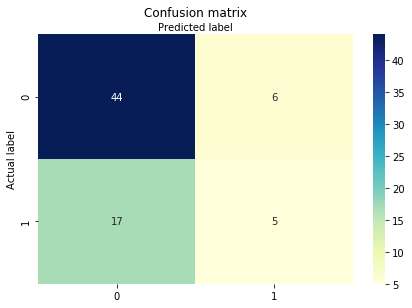

In [234]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [235]:
pd.Series
(y_test)

0     1.0
1     1.0
2     0.0
3     0.0
4     0.0
     ... 
67    0.0
68    0.0
69    0.0
70    0.0
71    1.0
Name: hp_class, Length: 72, dtype: float64

In [236]:
pd.Series(y_pred)

0     0.0
1     1.0
2     0.0
3     0.0
4     0.0
     ... 
67    0.0
68    0.0
69    0.0
70    0.0
71    0.0
Length: 72, dtype: float64

In [237]:
print("Accuracy:",metrics.accuracy_score(y_test, pd.Series(y_pred)))
print("Precision:",metrics.precision_score(y_test, pd.Series(y_pred)))
print("Recall:",metrics.recall_score(y_test, pd.Series(y_pred)))

Accuracy: 0.6805555555555556
Precision: 0.45454545454545453
Recall: 0.22727272727272727


How do we interpret this?

In [238]:
# Get features (words in our case)
vocab = vec.get_feature_names()
weights = lr.coef_.flatten()

# Sort the coefficients in descending order 
inds = np.argsort(lr.coef_.flatten())
# pick the first 20 as most informative features for not_flagged reviews
negative_words = [vocab[index] for index in inds[:20]]

# pick the last 20 features as most informative features for flagged reviews  
positive_words = [vocab[index] for index in inds[-20:]]
positive_words.reverse()

neg_words_weights = [(weights[index]) for index in inds[:20]]
pos_words_weights = [(weights[index]) for index in inds[-20:]]
pos_words_weights.reverse()

weight_df = pd.DataFrame({'Neg feats':negative_words, 'Neg weights':neg_words_weights, 
                   'Pos feats':positive_words, 'Pos weights':pos_words_weights})
weight_df

,Neg feats,Neg weights,Pos feats,Pos weights
0,general,-0.468822,mobile,0.351858
1,associate,-0.465043,activity,0.349571
2,responsible,-0.321477,sale,0.349030
3,references,-0.318716,communication,0.298402
4,manage,-0.283201,senior,0.287204
5,guest,-0.283156,punjabi,0.273529
6,meet,-0.272837,opportunity,0.272146
7,client,-0.267681,create,0.266409
8,objective,-0.266741,network,0.261873
9,task,-0.266556,dr,0.261400


### Bi-gram (pairs of words)

In [26]:
vec_2 = CountVectorizer(stop_words='english',ngram_range=(1, 2))
X_train_counts = vec_2.fit_transform(X_train)
X_test_counts = vec_2.transform(X_test)

In [27]:
lr = LogisticRegression()
lr.fit(X_train_counts, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [28]:
lr.score(X_train_counts, y_train)

1.0

In [29]:
lr.score(X_test_counts, y_test)

0.6666666666666666

In [30]:
y_pred = lr.predict(X_test_counts)

In [31]:
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[47,  3],
       [21,  1]], dtype=int64)

Text(0.5, 257.44, 'Predicted label')

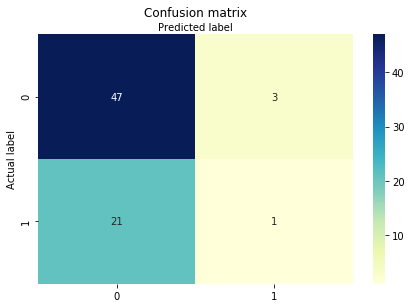

In [32]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [33]:
print("Accuracy:",metrics.accuracy_score(y_test, pd.Series(y_pred)))
print("Precision:",metrics.precision_score(y_test, pd.Series(y_pred)))
print("Recall:",metrics.recall_score(y_test, pd.Series(y_pred)))

Accuracy: 0.6666666666666666
Precision: 0.25
Recall: 0.045454545454545456


#### Interpretability

In [34]:
# Get features (words in our case)
vocab = vec_2.get_feature_names()
weights = lr.coef_.flatten()

# Sort the coefficients in descending order 
inds = np.argsort(lr.coef_.flatten())
# pick the first 20 as most informative features for not_flagged reviews
negative_words = [vocab[index] for index in inds[:20]]

# pick the last 20 features as most informative features for flagged reviews  
positive_words = [vocab[index] for index in inds[-20:]]
positive_words.reverse()

neg_words_weights = [(weights[index]) for index in inds[:20]]
pos_words_weights = [(weights[index]) for index in inds[-20:]]
pos_words_weights.reverse()

weight_df = pd.DataFrame({'Neg feats':negative_words, 'Neg weights':neg_words_weights, 
                   'Pos feats':positive_words, 'Pos weights':pos_words_weights})
weight_df

,Neg feats,Neg weights,Pos feats,Pos weights
0,sale associate,-0.282581,sale,0.302252
1,associate,-0.250102,mobile,0.234198
2,general,-0.249446,activity,0.171409
3,responsible,-0.201304,communication,0.155287
4,manage,-0.197796,punjabi,0.148505
5,references,-0.172245,policy,0.144312
6,guest,-0.168523,senior,0.143604
7,personal,-0.161649,hindi,0.138588
8,member,-0.153794,lead,0.137691
9,meet,-0.152480,communication skill,0.134888


## Model 2

In [35]:
features_set_01 = pd.read_csv('../../../data/clean_data/features_01_training_df.csv',index_col = 0)
features_set_01

,employee_code,highest_degree,background_highest_degree,country_highest_degree
0,BDP,bachelor,business,canada
1,F6Q,highschool,notspecified,canada
2,MRN,bachelor,business,canada
3,MXO,highschool,notspecified,unknown
4,N0Y,bachelor,science,canada
...,...,...,...,...
284,MUD,certificate,law,canada
285,L46,bachelor,science,india
286,N87,not_specified,notspecified,unknown
287,ND9,not_specified,notspecified,unknown


In [36]:
train_data_model_2 = pd.merge(features_set_01,training_df[['employee_code','birth_year','max_hire_date','rehired_','referral_flag','hp_class']], on = 'employee_code', how = "inner")

In [37]:
def get_age(df):
    age = datetime.strptime(df['max_hire_date'],'%Y-%m-%d').year - df['birth_year']
    return age

In [38]:
train_data_model_2['age'] = train_data_model_2.apply(lambda x:get_age(x), axis =1)

In [39]:
train_data_model_2

,employee_code,highest_degree,background_highest_degree,country_highest_degree,birth_year,max_hire_date,rehired_,referral_flag,hp_class,age
0,BDP,bachelor,business,canada,1983,2019-07-29,Yes,NaN,0.0,36
1,F6Q,highschool,notspecified,canada,1990,2019-05-28,Yes,NaN,1.0,29
2,MRN,bachelor,business,canada,1990,2019-02-20,NaN,NaN,0.0,29
3,MXO,highschool,notspecified,unknown,1988,2019-05-01,NaN,NaN,0.0,31
4,N0Y,bachelor,science,canada,1996,2019-06-07,NaN,NaN,0.0,23
...,...,...,...,...,...,...,...,...,...,...
284,MUD,certificate,law,canada,1994,2019-03-20,NaN,NaN,0.0,25
285,L46,bachelor,science,india,1996,2019-08-05,Yes,NaN,0.0,23
286,N87,not_specified,notspecified,unknown,1984,2019-09-09,NaN,NaN,0.0,35
287,ND9,not_specified,notspecified,unknown,1990,2019-11-20,NaN,NaN,0.0,29


In [40]:
## Replacing Nans

In [41]:
train_data_model_2["rehired_"].replace({"Yes": 1, "NaN": 0}, inplace=True)

In [42]:
train_data_model_2

,employee_code,highest_degree,background_highest_degree,country_highest_degree,birth_year,max_hire_date,rehired_,referral_flag,hp_class,age
0,BDP,bachelor,business,canada,1983,2019-07-29,1,NaN,0.0,36
1,F6Q,highschool,notspecified,canada,1990,2019-05-28,1,NaN,1.0,29
2,MRN,bachelor,business,canada,1990,2019-02-20,NaN,NaN,0.0,29
3,MXO,highschool,notspecified,unknown,1988,2019-05-01,NaN,NaN,0.0,31
4,N0Y,bachelor,science,canada,1996,2019-06-07,NaN,NaN,0.0,23
...,...,...,...,...,...,...,...,...,...,...
284,MUD,certificate,law,canada,1994,2019-03-20,NaN,NaN,0.0,25
285,L46,bachelor,science,india,1996,2019-08-05,1,NaN,0.0,23
286,N87,not_specified,notspecified,unknown,1984,2019-09-09,NaN,NaN,0.0,35
287,ND9,not_specified,notspecified,unknown,1990,2019-11-20,NaN,NaN,0.0,29


In [43]:
train_data_model_2 = train_data_model_2.fillna(0)

In [44]:
train_data_model_2.head(2)

,employee_code,highest_degree,background_highest_degree,country_highest_degree,birth_year,max_hire_date,rehired_,referral_flag,hp_class,age
0,BDP,bachelor,business,canada,1983,2019-07-29,1,0.0,0.0,36
1,F6Q,highschool,notspecified,canada,1990,2019-05-28,1,0.0,1.0,29


In [45]:
train_data_model_2.dtypes

employee_code                 object
highest_degree                object
background_highest_degree     object
country_highest_degree        object
birth_year                     int64
max_hire_date                 object
rehired_                       int64
referral_flag                float64
hp_class                     float64
age                            int64
dtype: object

In [46]:
# creating instance of one-hot-encoder
#ohe = OneHotEncoder(drop='first', handle_unknown='error')
ohe = OneHotEncoder( handle_unknown='error')
ohe.fit(train_data_model_2[['highest_degree']])

OneHotEncoder(categories='auto', drop=None, dtype=<class 'numpy.float64'>,
              handle_unknown='error', sparse=True)

In [47]:
ohe.transform(train_data_model_2[['highest_degree']]).toarray()

array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.]])

In [48]:
ohe.get_feature_names(['highest_degree'])

array(['highest_degree_bachelor', 'highest_degree_certificate',
       'highest_degree_highschool', 'highest_degree_master',
       'highest_degree_not_specified', 'highest_degree_other',
       'highest_degree_phd', 'highest_degree_postgrad'], dtype=object)

In [49]:
ohe_pd = pd.DataFrame(ohe.transform(train_data_model_2[['highest_degree']]).toarray(),columns =ohe.get_feature_names(['highest_degree']) )

In [50]:
new_df = train_data_model_2.join(ohe_pd)

In [51]:
new_df

,employee_code,highest_degree,background_highest_degree,country_highest_degree,birth_year,max_hire_date,rehired_,referral_flag,hp_class,age,highest_degree_bachelor,highest_degree_certificate,highest_degree_highschool,highest_degree_master,highest_degree_not_specified,highest_degree_other,highest_degree_phd,highest_degree_postgrad
0,BDP,bachelor,business,canada,1983,2019-07-29,1,0.0,0.0,36,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,F6Q,highschool,notspecified,canada,1990,2019-05-28,1,0.0,1.0,29,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,MRN,bachelor,business,canada,1990,2019-02-20,0,0.0,0.0,29,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,MXO,highschool,notspecified,unknown,1988,2019-05-01,0,0.0,0.0,31,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,N0Y,bachelor,science,canada,1996,2019-06-07,0,0.0,0.0,23,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284,MUD,certificate,law,canada,1994,2019-03-20,0,0.0,0.0,25,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
285,L46,bachelor,science,india,1996,2019-08-05,1,0.0,0.0,23,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
286,N87,not_specified,notspecified,unknown,1984,2019-09-09,0,0.0,0.0,35,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
287,ND9,not_specified,notspecified,unknown,1990,2019-11-20,0,0.0,0.0,29,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [52]:
train_y_new = new_df['hp_class']
train_x_new = new_df.drop(['employee_code','highest_degree','background_highest_degree','country_highest_degree','birth_year','max_hire_date','hp_class'],axis=1)

In [53]:
train_x_new.head(2)

,rehired_,referral_flag,age,highest_degree_bachelor,highest_degree_certificate,highest_degree_highschool,highest_degree_master,highest_degree_not_specified,highest_degree_other,highest_degree_phd,highest_degree_postgrad
0,1,0.0,36,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,0.0,29,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [54]:
lr = LogisticRegression()

In [55]:
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

NameError: name 'scores' is not defined

In [56]:
X_train, X_test, y_train, y_test = train_test_split(train_x_new, train_y_new, test_size=0.20, random_state=42)

In [57]:
lr = LogisticRegression(class_weight="balanced")
lr.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [58]:
lr.score(X_train, y_train)

0.5627705627705628

In [59]:
lr.score(X_test, y_test)

0.5517241379310345

In [60]:
y_pred = lr.predict(X_test)

In [61]:
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[20, 22],
       [ 4, 12]], dtype=int64)

Text(0.5, 257.44, 'Predicted label')

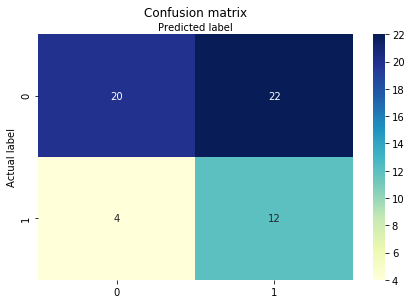

In [62]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [63]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

Accuracy: 0.5517241379310345
Precision: 0.35294117647058826
Recall: 0.75


In [64]:
lr.coef_

array([[-0.11654662,  0.04511551,  0.03997443,  0.14593947,  0.11261551,
        -0.60977454,  0.31994845,  0.46463108,  0.37322435, -0.31322272,
        -0.49271874]])

In [65]:
weights = lr.coef_.flatten()

In [66]:
X_test.columns

Index(['rehired_', 'referral_flag', 'age', 'highest_degree_bachelor',
       'highest_degree_certificate', 'highest_degree_highschool',
       'highest_degree_master', 'highest_degree_not_specified',
       'highest_degree_other', 'highest_degree_phd',
       'highest_degree_postgrad'],
      dtype='object')

In [67]:
pd.DataFrame({'feature':X_test.columns,'coefs':weights}).sort_values(by='coefs')

,feature,coefs
5,highest_degree_highschool,-0.609775
10,highest_degree_postgrad,-0.492719
9,highest_degree_phd,-0.313223
0,rehired_,-0.116547
2,age,0.039974
1,referral_flag,0.045116
4,highest_degree_certificate,0.112616
3,highest_degree_bachelor,0.145939
6,highest_degree_master,0.319948
8,highest_degree_other,0.373224


In [68]:
from sklearn.feature_selection import RFE, RFECV

In [69]:
X_train.columns

Index(['rehired_', 'referral_flag', 'age', 'highest_degree_bachelor',
       'highest_degree_certificate', 'highest_degree_highschool',
       'highest_degree_master', 'highest_degree_not_specified',
       'highest_degree_other', 'highest_degree_phd',
       'highest_degree_postgrad'],
      dtype='object')

In [70]:
lr = LogisticRegression(solver='liblinear')
rfe_cv = RFECV(estimator = lr, cv=5)
rfe_cv.fit(X_train, y_train)
print('Number of selected features %d'%rfe_cv.n_features_)
print('Feature mask: ', rfe_cv.support_)

Number of selected features 1
Feature mask:  [False False False False False  True False False False False False]


In [71]:
rfe_cv.support_

array([False, False, False, False, False,  True, False, False, False,
       False, False])

In [72]:
auc = metrics.roc_auc_score(y_test, y_pred)

In [73]:
auc

0.6130952380952381

## Pipeline Builder

In [74]:
#### Helper functions

In [239]:
from sklearn.pipeline import Pipeline, FeatureUnion, make_pipeline
from sklearn.compose import ColumnTransformer
from sklearn.dummy import DummyClassifier
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import normalize, scale, Normalizer, StandardScaler, OneHotEncoder
from collections import Counter
import re
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.dummy import DummyClassifier
from sklearn.tree import DecisionTreeRegressor
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.svm import SVC, SVR, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.dummy import DummyClassifier

In [240]:
def get_age(df):
    age = datetime.strptime(df['max_hire_date'],'%Y-%m-%d').year - df['birth_year']
    return age

In [241]:
def evalute_model(model,X_train, y_train,X_valid, y_valid,mdl_name = "", show = True):         
    #training metrics
    myDict = dict()
    for i in ['train','valid']:
        if i == "train":
            X= X_train
            Y = y_train
        else:
            X = X_valid
            Y = y_valid

    #predictin y for metrics purposose
        if len(mdl_name) > 0 :
            myDict.setdefault("model",[]).append(mdl_name)
        else:
            myDict.setdefault("model",[]).append(type(model).__name__)
            
        pred_y = pd.Series(model.predict(X))
        pred_y_proba = model.predict_proba(X)
    #creating empty dic
    #generating all the metrics for both training and validation
        
        myDict.setdefault("dataset",[]).append(i)
        for m in ['acc','precision','recall','auc','f1','log_loss','no_feat']:
            #n = i+"-"+m
            if m == "acc":                    
                myDict.setdefault(m, []).append(model.score(X, Y))
            elif m == "precision":
                myDict.setdefault(m, []).append(metrics.precision_score(Y,pred_y))
            elif m == "recall":
                myDict.setdefault(m, []).append(metrics.recall_score(Y,pred_y))
            elif m == "auc":
                myDict.setdefault(m, []).append(round(metrics.roc_auc_score(Y, pred_y),2))
            elif m == "f1":
                myDict.setdefault(m, []).append(round(metrics.f1_score(Y, pred_y),2))
            elif m == "log_loss":
                myDict.setdefault(m, []).append(round(metrics.log_loss(Y, pred_y_proba),2))
            elif m == "no_feat":
                myDict.setdefault(m, []).append(X.shape[1])
    #if show:
        #print(pd.DataFrame.from_dict(myDict, orient='index').reset_index())
        summary = pd.DataFrame.from_dict(myDict).reset_index()
        summary = summary.groupby(['model','dataset']).agg({'acc':"first",'precision':"first",'recall':"first",'auc':"first",'f1':"first",'log_loss':"first",'no_feat':"first"})
        
    return summary
    #return myDict

In [242]:
## Load dataset with all features

In [313]:
cleaned_english_resume = pd.read_csv('../../../data/clean_data/05182020_cleaned_english_resumes_V1.0.csv',index_col = 0)
training_df =  pd.read_csv('../../../data/V2 data 5.1.2020/train_dataset.csv',index_col = 0)
features_set_01 = pd.read_csv('../../../data/clean_data/features_01_training_df.csv',index_col = 0)
features_set_02 = pd.read_csv('../../../data/clean_data/features_02_training_df.csv',index_col = 0)

In [314]:
features_set_09

,employee_code,raw_char_count,raw_word_count,raw_Flesch-Kincaid_readability,raw_Gunning_FOG_readability,raw_automate_readability,raw_date_chall_readability,clean_char_count,clean_word_count,clean_Flesch-Kincaid_readability,clean_Gunning_FOG_readability,clean_automate_readability,clean_date_chall_readability
0,MZE,2311,317,49.1,51.87,61.0,14.96,1495,182,81.4,84.67,103.6,20.73
1,MRU,3875,565,20.0,20.97,25.2,10.54,2727,350,145.7,148.69,185.6,28.12
2,LAP,6569,922,42.4,43.29,53.3,12.75,4857,588,239.7,244.18,306.8,38.66
3,MYD,4495,642,47.4,47.29,60.3,12.53,3326,411,169.5,170.82,217.5,28.90
4,JJB,1961,206,20.5,14.60,29.9,9.60,866,106,51.7,52.59,65.4,15.45
...,...,...,...,...,...,...,...,...,...,...,...,...,...
283,MTI,2220,322,25.9,25.42,33.2,10.62,1418,181,78.6,79.25,101.3,18.55
284,N8M,3899,583,28.3,29.78,34.5,11.30,2620,332,138.7,142.44,177.0,26.67
285,MZX,2331,352,38.8,40.31,49.0,12.85,1519,205,86.8,88.63,111.3,19.97
286,N4J,1858,270,26.2,26.52,33.3,11.23,1278,165,72.4,73.76,92.9,17.28


In [315]:
features_set_03 = pd.read_csv('C:/Users/NIW/Glentel Inc/HR Analytics - Capstone Data/ubc_mds_team_share/06_clean_data/sales_custom_exp.csv',index_col=0)
features_set_04 = pd.read_csv('C:/Users/NIW/Glentel Inc/HR Analytics - Capstone Data/ubc_mds_team_share/06_clean_data/work_experience.csv')

In [316]:
features_set_03

,employee_code,sales_exp_months,customer_serv_exp_months,leader_ship_exp_months
0,BDP,143.0,0.0,0.0
1,F6Q,0.0,22.0,0.0
2,MRN,24.0,0.0,0.0
3,MXO,26.0,0.0,54.0
4,N0Y,18.0,19.0,0.0
...,...,...,...,...
284,MUD,0.0,0.0,5.0
285,L46,23.0,7.0,0.0
286,N87,0.0,15.0,37.0
287,ND9,23.0,0.0,0.0


In [317]:
features_set_04.head(4)

,employee_code,work1_company,work1_length,work2_company,work2_length,work3_company,work3_length,work4_company,work4_length,work5_company,work5_length,work6_company,work6_length,work7_company
0,BDP,Glentel Inc.,44.0,Glentel Inc.,63.0,NaN,36.0,NaN,NaN,NaN,NaN,NaN,NaN,
1,F6Q,Glentel/ Wireless ETC,NaN,Cityfone/ Rogers Communications,22.0,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,MRN,THE BRICK,24.0,CHAIRMANS MANUFACTURING,24.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,MXO,TRAVELEX GROUP CANADA,54.0,TRAVELEX GROUP CANADA,21.0,TRAVELEX GROUP CANADA,7.0,TRAVELEX GROUP CANADA,26.0,NaN,NaN,NaN,NaN,NaN


In [318]:
features_set_05 = pd.read_csv('C:/Users/NIW/Glentel Inc/HR Analytics - Capstone Data/ubc_mds_team_share/06_clean_data/avg_work_exp.csv')

In [319]:
features_set_05

,employee_code,work1_company,work1_length,work2_company,work2_length,work3_company,work3_length,work4_company,work4_length,work5_company,work5_length,work6_company,work6_length,work7_company,avg,job_hopper
0,BDP,Glentel Inc.,44.0,Glentel Inc.,63.0,NaN,36.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,47.67,0.0
1,F6Q,Glentel/ Wireless ETC,NaN,Cityfone/ Rogers Communications,22.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,22.00,0.0
2,MRN,THE BRICK,24.0,CHAIRMANS MANUFACTURING,24.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,24.00,0.0
3,MXO,TRAVELEX GROUP CANADA,54.0,TRAVELEX GROUP CANADA,21.0,TRAVELEX GROUP CANADA,7.0,TRAVELEX GROUP CANADA,26.0,NaN,NaN,NaN,NaN,NaN,27.00,0.0
4,N0Y,Sportcheck FGL Sports,4.0,Best Buy,14.0,Postmates,19.0,Windsor High School,8.0,NaN,NaN,NaN,NaN,NaN,11.25,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284,MUD,uBreakiFix,8.0,Toyota,3.0,Freedom Mobile,5.0,Canadian Armed Forces,6.0,NaN,NaN,NaN,NaN,NaN,5.50,1.0
285,L46,DOT LIGHTING,7.0,TBOOTH WIRELESS,23.0,GNSM,32.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20.67,0.0
286,N87,LOBLAWS,22.0,LINEN CHEST,37.0,TARGET,15.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,24.67,0.0
287,ND9,Save On Foods,32.0,Gamble Visuals,41.0,Staples,7.0,The Source,16.0,NaN,NaN,NaN,NaN,NaN,24.00,0.0


In [320]:
features_set_05 = pd.read_csv('C:/Users/NIW/Glentel Inc/HR Analytics - Capstone Data/ubc_mds_team_share/06_clean_data/avg_work_exp.csv')

In [321]:
features_set_05[features_set_05['employee_code'] =='N2L']

,employee_code,work1_company,work1_length,work2_company,work2_length,work3_company,work3_length,work4_company,work4_length,work5_company,work5_length,work6_company,work6_length,work7_company,avg,job_hopper
204,N2L,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [322]:
features_set_05 = pd.read_csv('C:/Users/NIW/Glentel Inc/HR Analytics - Capstone Data/ubc_mds_team_share/06_clean_data/avg_work_exp.csv')

In [323]:
features_set_05[features_set_05['employee_code']=='MX7']

,employee_code,work1_company,work1_length,work2_company,work2_length,work3_company,work3_length,work4_company,work4_length,work5_company,work5_length,work6_company,work6_length,work7_company,avg,job_hopper
272,MX7,Go Auto,0.0,The Brick,0.0,BLCO Foods,24.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.0,1.0


In [324]:
def job_hop_def(df):
    myDict = dict()
    no_jobs = df[['work1_company','work2_company','work3_company','work4_company','work5_company','work6_company','work7_company']].count()
    if df['avg'] <12 and no_jobs>2:
        job_hop_flag = 1
    else:
        job_hop_flag = 0
    myDict['no_jobs'] = no_jobs
    myDict['job_hopper_def2'] = job_hop_flag
    return myDict  

In [325]:
features_set_05 = pd.read_csv('C:/Users/NIW/Glentel Inc/HR Analytics - Capstone Data/ubc_mds_team_share/06_clean_data/avg_work_exp.csv')
features_set_05['no_jobs'] = features_set_05.apply(lambda x: job_hop_def(x)['no_jobs'],axis=1)

In [326]:
#features_set_05[features_set_05['no_jobs']]

In [327]:
features_set_05 = pd.read_csv('C:/Users/NIW/Glentel Inc/HR Analytics - Capstone Data/ubc_mds_team_share/06_clean_data/avg_work_exp.csv')
features_set_05['no_jobs'] = features_set_05.apply(lambda x: job_hop_def(x)['no_jobs'],axis=1)
features_set_05['job_hopper_def2'] = features_set_05.apply(lambda x: job_hop_def(x)['job_hopper_def2'],axis=1)
features_set_05['total_experience_months'] = features_set_05[['work1_length','work2_length','work3_length','work4_length','work5_length','work6_length']].sum(axis=1)
features_set_05['longest_tenure'] = features_set_05[['work1_length','work2_length','work3_length','work4_length','work5_length','work6_length']].max(axis=1)
features_set_05['shortest_tenure'] = features_set_05[['work1_length','work2_length','work3_length','work4_length','work5_length','work6_length']].min(axis=1)
features_set_05.rename(columns={"avg": "average_tenure_per_job"}, inplace=True)
features_set_05 = features_set_05[['employee_code','total_experience_months','longest_tenure','shortest_tenure','average_tenure_per_job','job_hopper','no_jobs','job_hopper_def2']]

In [328]:
#features_set_05.sort_values(by='shortest_tenure')
features_set_05.sort_values(by='no_jobs').tail()

,employee_code,total_experience_months,longest_tenure,shortest_tenure,average_tenure_per_job,job_hopper,no_jobs,job_hopper_def2
174,N1G,122.0,53.0,1.0,18.57,0.0,7,0
157,N5Q,133.0,45.0,3.0,23.29,0.0,7,0
74,N6R,0.0,NaN,NaN,NaN,NaN,7,0
87,MVW,41.0,21.0,2.0,6.43,1.0,7,1
11,N9S,64.0,20.0,3.0,11.29,1.0,7,1


In [329]:
features_set_06 = pd.read_csv('C:/Users/NIW/Glentel Inc/HR Analytics - Capstone Data/ubc_mds_team_share/06_clean_data/industry_exp.csv',index_col = 0)
features_set_06

,employee_code,food_service_industry_exp,apparel_industry_exp,supercenter_convenience_industry_exp,automotive_sales_industry_exp,blue_collar_industry_exp,consumer_electronics
0,BDP,0.0,0.0,0.0,0.0,0.0,0.0
1,F6Q,0.0,0.0,0.0,0.0,0.0,22.0
2,MRN,0.0,0.0,0.0,0.0,0.0,0.0
3,MXO,0.0,0.0,0.0,0.0,0.0,0.0
4,N0Y,0.0,0.0,0.0,14.0,0.0,14.0
...,...,...,...,...,...,...,...
284,MUD,0.0,0.0,0.0,3.0,0.0,5.0
285,L46,0.0,23.0,0.0,0.0,0.0,0.0
286,N87,0.0,0.0,22.0,0.0,0.0,0.0
287,ND9,0.0,0.0,39.0,23.0,0.0,23.0


In [330]:
features_set_07 = pd.read_csv('C:/Users/NIW/Glentel Inc/HR Analytics - Capstone Data/ubc_mds_team_share/06_clean_data/competitor_experience.csv')
features_set_07 = features_set_07.drop(['work1_flag','work2_flag','work3_flag','work4_flag','work5_flag','work6_flag','work7_flag'],axis=1)
features_set_07.rename(columns={"Wow[!]* Mobile_competitor_exp": "Wow_Mobile_competitor_exp"}, inplace=True)
features_set_07.head(4)

,employee_code,competitor_experience,Freedom_competitor_exp,Koodo_competitor_exp,Shaw_competitor_exp,Telus_competitor_exp,Bell_competitor_exp,Rogers_competitor_exp,The Mobile Shop_competitor_exp,Best Buy_competitor_exp,Videotron_competitor_exp,Wow_Mobile_competitor_exp,The Source_competitor_exp,Walmart_competitor_exp,Virgin Mobile_competitor_exp,Osl_competitor_exp
0,BDP,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,F6Q,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0
2,MRN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,MXO,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [331]:
## Helpers for transforming features_set_08

In [472]:
def industry_experience_feats_gen(df):
    myDict = {'Clothing & Footwear':0,
                 'Consumer electronics':0,
                 'Food Service':0,
                 'Food-Convenience-Pharmacy':0,
                 'Other':0,
                 'Sport_Travel_Enterntain_Hotel':0,
                 'Telecommunications':0,
                 'unknown':0}
    electro_telco_counter = 0
    most_recent = 0
    for i in range(7):
        col_name = "industry_"+str(i+1)
        industry_label = df[col_name]
        if industry_label is not np.nan:
            myDict[industry_label] = 1
        if industry_label in ['Consumer electronics','Telecommunications'] and most_recent == 0:
            most_recent = i+1
        if industry_label in ['Consumer electronics','Telecommunications']:
            electro_telco_counter += 1
    if most_recent == 1:
        recency_freq = "high"
    elif most_recent >1:
        recency_freq = "low"
    elif most_recent ==0:
        recency_freq = "inexistant"        
    myDict['exp_number_of_diff_industries'] = sum(myDict.values())
    myDict['most_recent_industry_exp'] = df['industry_1']
    myDict['telco_electro_recency'] = most_recent
    myDict['telco_electro_jobs'] = electro_telco_counter
    myDict['recency_type_telco_electro_exp'] = recency_freq
    return myDict   

In [3]:
features_set_08 = pd.read_csv('C:/Users/NIW/Glentel Inc/HR Analytics - Capstone Data/ubc_mds_team_share/03_feature_extraction/output/job_category_features_2020_06_04_V3.csv')
features_set_08.sample(10)

,employee_code,work1_company,work2_company,work3_company,work4_company,work5_company,work6_company,work7_company,industry_1,industry_2,industry_3,industry_4,industry_5,industry_6,industry_7
90,N26,ZARA,Holister,MCDONALDS,NaN,NaN,NaN,NaN,Clothing & Footwear,Clothing & Footwear,Food Service,NaN,NaN,NaN,NaN
42,MYH,Best Buy,Spunky’s Convenience Store,Subway,Amazon Fulfillment Centre,Punjab Technical University ...,NaN,NaN,Telecommunications,Food-Convenience-Pharmacy,Food Service,Consumer electronics,unknown,NaN,NaN
186,N7J,TC Care Ltd (England),Blue Ocean Tea Company,Shell,The Source,NaN,NaN,NaN,unknown,unknown,Food-Convenience-Pharmacy,Telecommunications,NaN,NaN,NaN
86,MUA,Best Buy Canada,"Government of Canada, Department Of Defence",Rogers Communications,Home Depot Canada,City of Edmonton,WestJet,Tim Hortons,Telecommunications,unknown,Telecommunications,unknown,unknown,unknown,Food Service
262,N43,WOW Mobile,Jackpine lumber mill,Safeway,NaN,NaN,NaN,NaN,Telecommunications,unknown,Food-Convenience-Pharmacy,NaN,NaN,NaN,NaN
22,N5C,Private Contractor,Leduc Hyundai,Lo Cost Liquor,YMCA,City of Edmonton,NaN,NaN,unknown,Other,unknown,unknown,unknown,NaN,NaN
15,LWG,McDonalds,Tbooth Wireless,NaN,NaN,NaN,NaN,NaN,Food Service,Telecommunications,NaN,NaN,NaN,NaN,NaN
59,N8C,The Source,Education Planning Consultant,World System Builder,Best Buy Canada,Rogers Telecommunications,Future Shop,NaN,Telecommunications,unknown,unknown,Telecommunications,Telecommunications,Consumer electronics,NaN
79,NBJ,Knew sales Group CA,Knew sales Group CA,Mac’s Convenience Store Calgary,Wassan Gas Agency,NaN,NaN,NaN,unknown,unknown,Food-Convenience-Pharmacy,unknown,NaN,NaN,NaN
134,N2D,BEST BUY,HOME LIGHTING FACTORY OUTLET,NaN,NaN,NaN,NaN,NaN,Telecommunications,unknown,NaN,NaN,NaN,NaN,NaN


In [473]:
features_set_08 = pd.read_csv('C:/Users/NIW/Glentel Inc/HR Analytics - Capstone Data/ubc_mds_team_share/03_feature_extraction/output/job_category_features_2020_06_04_V3.csv')
features_set_08['temp_ind_feat'] = features_set_08.apply(lambda x:industry_experience_feats_gen(x),axis=1)
features_set_08['clothing_and_footwear_ind_exp_flag'] = features_set_08.temp_ind_feat.apply(lambda x: x['Clothing & Footwear'])
features_set_08['consumer_electronics_ind_exp_flag'] = features_set_08.temp_ind_feat.apply(lambda x: x['Consumer electronics'])
features_set_08['food_service_ind_exp_flag'] = features_set_08.temp_ind_feat.apply(lambda x: x['Food Service'])
features_set_08['other_uknown_ind_exp_flag'] = features_set_08.temp_ind_feat.apply(lambda x: x['Other']) + features_set_08.temp_ind_feat.apply(lambda x: x['unknown']) 
features_set_08['sport_travel_ind_exp_flag'] = features_set_08.temp_ind_feat.apply(lambda x: x['Sport_Travel_Enterntain_Hotel'])
features_set_08['teleco_ind_exp_flag'] = features_set_08.temp_ind_feat.apply(lambda x: x['Telecommunications'])
features_set_08['exp_number_of_diff_industries'] = features_set_08.temp_ind_feat.apply(lambda x: x['exp_number_of_diff_industries'])
features_set_08['most_recent_industry_exp'] = features_set_08.temp_ind_feat.apply(lambda x: x['most_recent_industry_exp'])
features_set_08['telco_electro_recency'] = features_set_08.temp_ind_feat.apply(lambda x: x['telco_electro_recency'])
features_set_08['telco_electro_jobs'] = features_set_08.temp_ind_feat.apply(lambda x: x['telco_electro_jobs'])
features_set_08['recency_type_telco_electro_exp'] = features_set_08.temp_ind_feat.apply(lambda x: x['recency_type_telco_electro_exp'])
features_set_08 = features_set_08.drop(['work1_company','work2_company','work3_company','work4_company','work5_company','work6_company','work7_company','industry_1','industry_2','industry_3','industry_4','industry_5','industry_6','industry_7','temp_ind_feat'],axis=1)
features_set_08.head(4)

,employee_code,clothing_and_footwear_ind_exp_flag,consumer_electronics_ind_exp_flag,food_service_ind_exp_flag,other_uknown_ind_exp_flag,sport_travel_ind_exp_flag,teleco_ind_exp_flag,exp_number_of_diff_industries,most_recent_industry_exp,telco_electro_recency,telco_electro_jobs,recency_type_telco_electro_exp
0,BDP,0,0,0,0,0,1,1,Telecommunications,1,2,high
1,F6Q,0,0,0,0,0,1,1,Telecommunications,1,2,high
2,MRN,0,0,0,1,0,0,1,Other,0,0,inexistant
3,MXO,0,0,0,0,1,0,1,Sport_Travel_Enterntain_Hotel,0,0,inexistant


In [372]:
features_set_08.groupby(['most_recent_industry_exp']).agg({"employee_code":"count"})

,employee_code
most_recent_industry_exp,
Clothing & Footwear,14
Consumer electronics,10
Food Service,21
Food-Convenience-Pharmacy,12
Other,33
Sport_Travel_Enterntain_Hotel,8
Telecommunications,119
unknown,66


In [474]:
features_set_09 = pd.read_csv('C:/Users/NIW/Glentel Inc/HR Analytics - Capstone Data/ubc_mds_team_share/06_clean_data/communication_level.csv',index_col = 0)
features_set_09 = features_set_09.drop(['employee_name'],axis=1)
features_set_09.head(5)

,employee_code,raw_char_count,raw_word_count,raw_Flesch-Kincaid_readability,raw_Gunning_FOG_readability,raw_automate_readability,raw_date_chall_readability,clean_char_count,clean_word_count,clean_Flesch-Kincaid_readability,clean_Gunning_FOG_readability,clean_automate_readability,clean_date_chall_readability
0,MZE,2311,317,49.1,51.87,61.0,14.96,1495,182,81.4,84.67,103.6,20.73
1,MRU,3875,565,20.0,20.97,25.2,10.54,2727,350,145.7,148.69,185.6,28.12
2,LAP,6569,922,42.4,43.29,53.3,12.75,4857,588,239.7,244.18,306.8,38.66
3,MYD,4495,642,47.4,47.29,60.3,12.53,3326,411,169.5,170.82,217.5,28.90
4,JJB,1961,206,20.5,14.60,29.9,9.60,866,106,51.7,52.59,65.4,15.45


In [475]:
## Merging data together

In [596]:
model_data = pd.merge(cleaned_english_resume[['employee_code','clean_text']],training_df,on="employee_code",how = "inner")
model_data = model_data.drop_duplicates()

In [597]:
model_data = pd.merge(model_data,features_set_01,on="employee_code",how = "inner")
model_data = pd.merge(model_data,features_set_02,on="employee_code",how = "inner")
model_data = pd.merge(model_data,features_set_03,on="employee_code",how = "inner")
####features_set_04 is skipped
model_data = pd.merge(model_data,features_set_05,on="employee_code",how = "inner")
model_data = pd.merge(model_data,features_set_06,on="employee_code",how = "inner")
model_data = pd.merge(model_data,features_set_07,on="employee_code",how = "inner")
model_data = pd.merge(model_data,features_set_08,on="employee_code",how = "inner")
model_data = pd.merge(model_data,features_set_09,on="employee_code",how = "inner")
model_data['telco_electro_perc'] = model_data['telco_electro_jobs']/model_data['no_jobs']

In [598]:
model_data.columns

Index(['employee_code', 'clean_text', 'max_hire_date', 'gender', 'job_title',
       'worker_category', 'birth_year', 'generation', 'termination_date',
       'termination_reason', 'termination_type', 'tenure_at_termination',
       'end_perf_window', 'tenure_at_end_perf_window', 'employee_name',
       'language', 'resume_found', 'months_high_perf', 'months_with_perf',
       'hp_perc', 'hp_class', 'perf_found', 'rehired_', 'referral_flag',
       'exclusion_code', 'highest_degree', 'background_highest_degree',
       'country_highest_degree', 'no_lang_spoken', 'trilingual_flag',
       'goal_record', 'sales_customer_base_exp', 'volunteer_exp',
       'problem_solver', 'sports_mention', 'communication_skills',
       'team_player', 'leadership_mention', 'sales_exp_months',
       'customer_serv_exp_months', 'leader_ship_exp_months',
       'total_experience_months', 'longest_tenure', 'shortest_tenure',
       'average_tenure_per_job', 'job_hopper', 'no_jobs', 'job_hopper_def2',
      

In [599]:
model_data = model_data.drop_duplicates(subset ="employee_code")

In [600]:
model_data[model_data['employee_code']=='N45']

,employee_code,clean_text,max_hire_date,gender,job_title,worker_category,birth_year,generation,termination_date,termination_reason,...,raw_Gunning_FOG_readability,raw_automate_readability,raw_date_chall_readability,clean_char_count,clean_word_count,clean_Flesch-Kincaid_readability,clean_Gunning_FOG_readability,clean_automate_readability,clean_date_chall_readability,telco_electro_perc
243,N45,resume Ph SKILLS Diligent drive responsible Pu...,2019-07-17,Male,SALES ASSOCIATE,Permanent Full Time,1990,Millenial: 1983-1999,NaN,NaN,...,125.83,153.9,23.97,1257,156,70.0,73.17,89.8,19.27,0.0


In [601]:
model_data['age'] = model_data.apply(lambda x: get_age(x),axis =1)
model_data["rehired_"].replace({"Yes": 1, "NaN": 0}, inplace=True)
model_data = model_data.fillna({'most_recent_industry_exp':'unknown'})
model_data = model_data.fillna(0)

In [602]:
def no_job_grouping(njbs):
    if njbs == 0:
        label="no_previous_jobs"
    elif njbs <3 :
        label ="few"
    elif njbs >= 3:
        label = "multiple"
    else:
        label="no_previous_jobs"
    return label        

In [603]:
def perc_telco_elec_exp_grouping(exp_perc):
    if exp_perc == 0:
        label = "inexistant"
    elif exp_perc <= 0.20:
        label="low"
    elif exp_perc > 0.20:
        label ="significant"
    else:
        label = "inexistant"
    return label     

In [604]:
def readability_grouping(read_score):
    if read_score <= 91.5:
        label = "low"
    elif read_score > 91.5:
        label ="high"
    else:
        label = "TBD"
    return label    

In [644]:
def highest_degree_flag_01(deg):
    if deg in ['bachelor','master','phd']:
        label = 1
    else:
        label = 0
    return label

In [643]:
def highest_degree_flag_02(deg):
    if deg in ['highschool']:
        label = 1
    else:
        label = 0
    return label 

In [661]:
def business_flag(deg):
    if deg in ['business']:
        label = 1
    else:
        label = 0
    return label 

In [662]:
model_data['no_job_categorical'] = model_data.no_jobs.apply(lambda x:no_job_grouping(x))
model_data['telco_electro_perc_group'] = model_data.telco_electro_perc.apply(lambda x:perc_telco_elec_exp_grouping(x))
model_data['read_score_categorical'] = model_data['clean_Flesch-Kincaid_readability'].apply(lambda x:readability_grouping(x))
model_data['flag_hd_bachelor_plus'] = model_data.highest_degree.apply(lambda x:highest_degree_flag_01(x))
model_data['flag_hd_highschool'] = model_data.highest_degree.apply(lambda x:highest_degree_flag_02(x))
model_data['business_flag'] = model_data.background_highest_degree.apply(lambda x:business_flag(x))

In [663]:
model_data.columns

Index(['employee_code', 'clean_text', 'max_hire_date', 'gender', 'job_title',
       'worker_category', 'birth_year', 'generation', 'termination_date',
       'termination_reason', 'termination_type', 'tenure_at_termination',
       'end_perf_window', 'tenure_at_end_perf_window', 'employee_name',
       'language', 'resume_found', 'months_high_perf', 'months_with_perf',
       'hp_perc', 'hp_class', 'perf_found', 'rehired_', 'referral_flag',
       'exclusion_code', 'highest_degree', 'background_highest_degree',
       'country_highest_degree', 'no_lang_spoken', 'trilingual_flag',
       'goal_record', 'sales_customer_base_exp', 'volunteer_exp',
       'problem_solver', 'sports_mention', 'communication_skills',
       'team_player', 'leadership_mention', 'sales_exp_months',
       'customer_serv_exp_months', 'leader_ship_exp_months',
       'total_experience_months', 'longest_tenure', 'shortest_tenure',
       'average_tenure_per_job', 'job_hopper', 'no_jobs', 'job_hopper_def2',
      

In [666]:
model_data[['employee_code','telco_electro_jobs','telco_electro_recency','recency_type_telco_electro_exp','no_job_categorical','telco_electro_perc_group','read_score_categorical','flag_hd_bachelor_plus','flag_hd_highschool','business_flag','no_jobs']].to_csv("C:/Users/NIW/Documents/Capstone Project/data/clean_data/additional_set_feats_01.csv",index = False)

## Understanding Variables

In [667]:
model_data[['telco_electro_perc','telco_electro_perc_group']]

,telco_electro_perc,telco_electro_perc_group
0,0.400000,significant
1,1.000000,significant
2,0.000000,inexistant
3,0.166667,low
4,0.250000,significant
...,...,...
314,0.500000,significant
315,0.000000,inexistant
316,0.666667,significant
317,1.000000,significant


In [670]:
model_data.groupby(['consumer_electronics']).agg({"employee_code":"count","hp_class":"mean"})

KeyError: 'background_highest_degree_law'

In [671]:
model_data.groupby(['most_recent_industry_exp']).agg({"employee_code":"count","hp_class":"mean"})

,employee_code,hp_class
most_recent_industry_exp,,
Clothing & Footwear,14,0.071429
Consumer electronics,10,0.100000
Food Service,21,0.238095
Food-Convenience-Pharmacy,11,0.000000
Other,33,0.060606
Sport_Travel_Enterntain_Hotel,8,0.000000
Telecommunications,119,0.327731
unknown,72,0.305556


In [672]:
model_data.groupby(['recency_type_telco_electro_exp']).agg({"employee_code":"count","hp_class":"mean"})

,employee_code,hp_class
recency_type_telco_electro_exp,,
high,129,0.310078
inexistant,103,0.155340
low,56,0.250000


In [608]:
model_data.groupby(['read_score_categorical']).agg({"employee_code":"count","hp_class":"mean"})

,employee_code,hp_class
read_score_categorical,,
high,142,0.281690
low,146,0.205479


In [609]:
model_data[['clean_Flesch-Kincaid_readability']]

,clean_Flesch-Kincaid_readability
0,162.9
1,275.6
2,171.0
3,142.6
4,81.4
...,...
314,107.9
315,77.8
316,78.6
317,34.2


In [610]:
model_data[['most_recent_industry_exp','employee_code']].groupby(['most_recent_industry_exp']).agg({'employee_code':'count'})

,employee_code
most_recent_industry_exp,
Clothing & Footwear,14
Consumer electronics,10
Food Service,21
Food-Convenience-Pharmacy,11
Other,33
Sport_Travel_Enterntain_Hotel,8
Telecommunications,119
unknown,72


In [611]:
col_drop = ['max_hire_date','job_title','worker_category','birth_year',
            'termination_date','termination_reason','termination_type',
            'tenure_at_termination','end_perf_window','tenure_at_end_perf_window',
            'employee_name','language','resume_found','months_high_perf','months_with_perf',
           'hp_perc','hp_class','perf_found','exclusion_code']

In [612]:
x_model = model_data.drop(col_drop,axis=1)
y_model = model_data['hp_class']

In [613]:
x_model.head(5)

,employee_code,clean_text,gender,generation,rehired_,referral_flag,highest_degree,background_highest_degree,country_highest_degree,no_lang_spoken,...,clean_word_count,clean_Flesch-Kincaid_readability,clean_Gunning_FOG_readability,clean_automate_readability,clean_date_chall_readability,telco_electro_perc,age,no_job_categorical,telco_electro_perc_group,read_score_categorical
0,N3O,Skills Experience Carmelo Avenue Ph ability wo...,Female,Millenial: 1983-1999,0,0.0,bachelor,interactive art technology,canada,1,...,394,162.9,165.52,208.1,28.87,0.400000,25,multiple,significant,high
1,BDP,thank consideration role Project Manager Busin...,Male,Millenial: 1983-1999,1,0.0,bachelor,business,canada,1,...,680,275.6,278.35,351.8,42.24,1.000000,36,few,significant,high
2,MZV,Gerrish Apt entrepreneur new customer acquisit...,Male,Millenial: 1983-1999,0,0.0,other,marketing,canada,1,...,415,171.0,174.58,218.4,29.85,0.000000,29,multiple,inexistant,high
3,N62,Montpelier OVERVIEW Languages Fluent English S...,Male,Millenial: 1983-1999,0,1.0,bachelor,computer system,canada,4,...,336,142.6,145.47,181.6,29.04,0.166667,25,multiple,low,high
4,N7R,communicate value proposition Beryl Private ob...,Male,Millenial: 1983-1999,0,1.0,bachelor,accounting,unknown,1,...,176,81.4,83.81,102.0,20.53,0.250000,28,multiple,significant,low


### Train and Validation Datasets

In [614]:
X_train, X_valid, y_train, y_valid = train_test_split(x_model, y_model, test_size=0.20, random_state=1234)

### Count Vectorizer Model -  BOW

##### What are the most frequent words?

In [615]:
vec = CountVectorizer(stop_words='english',ngram_range=(2, 2))
X_train_count_vec = vec.fit_transform(X_train['clean_text'])
X_valid_count_vec = vec.transform(X_valid['clean_text'])

In [616]:
X_train_count_vec

<230x40272 sparse matrix of type '<class 'numpy.int64'>'
	with 52914 stored elements in Compressed Sparse Row format>

In [617]:
lr = LogisticRegression(class_weight="balanced")
lr.fit(X_train_count_vec, y_train)

LogisticRegression(C=1.0, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [618]:
cv1 = evalute_model(lr,X_train_count_vec, y_train,X_valid_count_vec, y_valid,show = True,mdl_name='Count Vec LR')
cv1

C:\Users\NIW\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


acc  precision  recall  auc   f1  log_loss  no_feat
model        dataset                                                          
Count Vec LR train    1.000000        1.0     1.0  1.0  1.0      0.02    40272
             valid    0.775862        0.0     0.0  0.5  0.0      0.54    40272

#### Selecting most informative words n-grams

In [619]:
vocab = vec.get_feature_names()
weights = lr.coef_.flatten()

# Sort the coefficients in descending order 
inds = np.argsort(lr.coef_.flatten())
# pick the first 20 as most informative features for not_flagged reviews
negative_words = [vocab[index] for index in inds[:20]]

# pick the last 20 features as most informative features for flagged reviews  
positive_words = [vocab[index] for index in inds[-20:]]
positive_words.reverse()

neg_words_weights = [(weights[index]) for index in inds[:20]]
pos_words_weights = [(weights[index]) for index in inds[-20:]]
pos_words_weights.reverse()

weight_df = pd.DataFrame({'Neg feats':negative_words, 'Neg weights':neg_words_weights, 
                   'Pos feats':positive_words, 'Pos weights':pos_words_weights})
weight_df

,Neg feats,Neg weights,Pos feats,Pos weights
0,sale associate,-0.291163,communication skill,0.279128
1,high school,-0.191893,ensure customer,0.212689
2,customer service,-0.169689,customer satisfaction,0.198559
3,available request,-0.157930,sale target,0.196868
4,excellent customer,-0.137523,time frame,0.184704
5,health safety,-0.129824,high level,0.160940
6,team player,-0.127623,rogers communications,0.155917
7,store manager,-0.120927,hindi punjabi,0.155715
8,provide excellent,-0.113475,sale representative,0.153371
9,skill work,-0.112043,university fraser,0.150770


### TF-ID Model

In [620]:
tfidfvec = TfidfVectorizer(ngram_range=(1, 3))
X_train_tfidf = tfidfvec.fit_transform(X_train['clean_text'])  
X_valid_tfidf = tfidfvec.transform(X_valid['clean_text'])

In [621]:
lr = LogisticRegression(class_weight="balanced")
lr.fit(X_train_tfidf, y_train)

LogisticRegression(C=1.0, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [622]:
tfid = evalute_model(lr,X_train_tfidf, y_train,X_valid_tfidf, y_valid,show = True,mdl_name='TF-ID LR')
tfid

acc  precision    recall   auc    f1  log_loss  no_feat
model    dataset                                                              
TF-ID LR train    1.000000        1.0  1.000000  1.00  1.00      0.48    99887
         valid    0.775862        0.5  0.076923  0.53  0.13      0.63    99887

In [623]:
vocab = tfidfvec.get_feature_names()
weights = lr.coef_.flatten()

# Sort the coefficients in descending order 
inds = np.argsort(lr.coef_.flatten())
# pick the first 20 as most informative features for not_flagged reviews
negative_words = [vocab[index] for index in inds[:20]]

# pick the last 20 features as most informative features for flagged reviews  
positive_words = [vocab[index] for index in inds[-20:]]
positive_words.reverse()

neg_words_weights = [(weights[index]) for index in inds[:20]]
pos_words_weights = [(weights[index]) for index in inds[-20:]]
pos_words_weights.reverse()

weight_df = pd.DataFrame({'Neg feats':negative_words, 'Neg weights':neg_words_weights, 
                   'Pos feats':positive_words, 'Pos weights':pos_words_weights})
weight_df

,Neg feats,Neg weights,Pos feats,Pos weights
0,food,-0.265929,sale,0.371016
1,general,-0.216291,mobile,0.346721
2,responsible,-0.176052,lead,0.231738
3,saint,-0.174002,england,0.198113
4,guest,-0.173508,part,0.186862
5,return,-0.161074,vietnam,0.183975
6,sale associate,-0.151548,closing,0.178885
7,production,-0.149070,punjab,0.177460
8,manage,-0.143911,target,0.177409
9,management,-0.142550,university fraser,0.176520


> Both TD-IDF and Count Vec are done to obtain ideas of features of attributes correlated to high performance

## Pipeline Creation

In [624]:
import scipy.stats.stats as stats
import traceback
import pandas.core.algorithms as algos

### Are all features relevant?

In [625]:
max_bin = 20
force_bin = 3
def mono_bin(Y, X, n = max_bin):
    df1 = pd.DataFrame({"X": X, "Y": Y})
    justmiss = df1[['X','Y']][df1.X.isnull()]
    notmiss = df1[['X','Y']][df1.X.notnull()]
    r = 0
    while np.abs(r) < 1:
        try:
            d1 = pd.DataFrame({"X": notmiss.X, "Y": notmiss.Y, "Bucket": pd.qcut(notmiss.X, n)})
            d2 = d1.groupby('Bucket', as_index=True)
            r, p = stats.spearmanr(d2.mean().X, d2.mean().Y)
            n = n - 1 
        except Exception as e:
            n = n - 1

    if len(d2) == 1:
        n = force_bin         
        bins = algos.quantile(notmiss.X, np.linspace(0, 1, n))
        if len(np.unique(bins)) == 2:
            bins = np.insert(bins, 0, 1)
            bins[1] = bins[1]-(bins[1]/2)
        d1 = pd.DataFrame({"X": notmiss.X, "Y": notmiss.Y, "Bucket": pd.cut(notmiss.X, np.unique(bins),include_lowest=True)}) 
        d2 = d1.groupby('Bucket', as_index=True)
    
    d3 = pd.DataFrame({},index=[])
    d3["MIN_VALUE"] = d2.min().X
    d3["MAX_VALUE"] = d2.max().X
    d3["COUNT"] = d2.count().Y
    d3["EVENT"] = d2.sum().Y
    d3["NONEVENT"] = d2.count().Y - d2.sum().Y
    d3=d3.reset_index(drop=True)
    
    if len(justmiss.index) > 0:
        d4 = pd.DataFrame({'MIN_VALUE':np.nan},index=[0])
        d4["MAX_VALUE"] = np.nan
        d4["COUNT"] = justmiss.count().Y
        d4["EVENT"] = justmiss.sum().Y
        d4["NONEVENT"] = justmiss.count().Y - justmiss.sum().Y
        d3 = d3.append(d4,ignore_index=True)
    
    d3["EVENT_RATE"] = d3.EVENT/d3.COUNT
    d3["NON_EVENT_RATE"] = d3.NONEVENT/d3.COUNT
    d3["DIST_EVENT"] = d3.EVENT/d3.sum().EVENT
    d3["DIST_NON_EVENT"] = d3.NONEVENT/d3.sum().NONEVENT
    d3["WOE"] = np.log(d3.DIST_EVENT/d3.DIST_NON_EVENT)
    d3["IV"] = (d3.DIST_EVENT-d3.DIST_NON_EVENT)*np.log(d3.DIST_EVENT/d3.DIST_NON_EVENT)
    d3["VAR_NAME"] = "VAR"
    d3 = d3[['VAR_NAME','MIN_VALUE', 'MAX_VALUE', 'COUNT', 'EVENT', 'EVENT_RATE', 'NONEVENT', 'NON_EVENT_RATE', 'DIST_EVENT','DIST_NON_EVENT','WOE', 'IV']]       
    d3 = d3.replace([np.inf, -np.inf], 0)
    d3.IV = d3.IV.sum()
    
    return(d3)

In [626]:
def char_bin(Y, X):
        
    df1 = pd.DataFrame({"X": X, "Y": Y})
    justmiss = df1[['X','Y']][df1.X.isnull()]
    notmiss = df1[['X','Y']][df1.X.notnull()]    
    df2 = notmiss.groupby('X',as_index=True)
    
    d3 = pd.DataFrame({},index=[])
    d3["COUNT"] = df2.count().Y
    d3["MIN_VALUE"] = df2.sum().Y.index
    d3["MAX_VALUE"] = d3["MIN_VALUE"]
    d3["EVENT"] = df2.sum().Y
    d3["NONEVENT"] = df2.count().Y - df2.sum().Y
    
    if len(justmiss.index) > 0:
        d4 = pd.DataFrame({'MIN_VALUE':np.nan},index=[0])
        d4["MAX_VALUE"] = np.nan
        d4["COUNT"] = justmiss.count().Y
        d4["EVENT"] = justmiss.sum().Y
        d4["NONEVENT"] = justmiss.count().Y - justmiss.sum().Y
        d3 = d3.append(d4,ignore_index=True)
    
    d3["EVENT_RATE"] = d3.EVENT/d3.COUNT
    d3["NON_EVENT_RATE"] = d3.NONEVENT/d3.COUNT
    d3["DIST_EVENT"] = d3.EVENT/d3.sum().EVENT
    d3["DIST_NON_EVENT"] = d3.NONEVENT/d3.sum().NONEVENT
    d3["WOE"] = np.log(d3.DIST_EVENT/d3.DIST_NON_EVENT)
    d3["IV"] = (d3.DIST_EVENT-d3.DIST_NON_EVENT)*np.log(d3.DIST_EVENT/d3.DIST_NON_EVENT)
    d3["VAR_NAME"] = "VAR"
    d3 = d3[['VAR_NAME','MIN_VALUE', 'MAX_VALUE', 'COUNT', 'EVENT', 'EVENT_RATE', 'NONEVENT', 'NON_EVENT_RATE', 'DIST_EVENT','DIST_NON_EVENT','WOE', 'IV']]      
    d3 = d3.replace([np.inf, -np.inf], 0)
    d3.IV = d3.IV.sum()
    d3 = d3.reset_index(drop=True)
    
    return(d3)

In [627]:
def data_vars(df1, target):
    
    stack = traceback.extract_stack()
    filename, lineno, function_name, code = stack[-2]
    vars_name = re.compile(r'\((.*?)\).*$').search(code).groups()[0]
    final = (re.findall(r"[\w']+", vars_name))[-1]
    
    x = df1.dtypes.index
    count = -1
    
    for i in x:
        if i.upper() not in (final.upper()):
            if np.issubdtype(df1[i], np.number) and len(pd.Series.unique(df1[i])) > 2:
                conv = mono_bin(target, df1[i])
                conv["VAR_NAME"] = i
                count = count + 1
            else:
                conv = char_bin(target, df1[i])
                conv["VAR_NAME"] = i            
                count = count + 1
                
            if count == 0:
                iv_df = conv
            else:
                iv_df = iv_df.append(conv,ignore_index=True)
    
    iv = pd.DataFrame({'IV':iv_df.groupby('VAR_NAME').IV.max()})
    iv = iv.reset_index()
    return(iv_df,iv)

In [633]:
X_train.columns

Index(['employee_code', 'clean_text', 'gender', 'generation', 'rehired_',
       'referral_flag', 'highest_degree', 'background_highest_degree',
       'country_highest_degree', 'no_lang_spoken', 'trilingual_flag',
       'goal_record', 'sales_customer_base_exp', 'volunteer_exp',
       'problem_solver', 'sports_mention', 'communication_skills',
       'team_player', 'leadership_mention', 'sales_exp_months',
       'customer_serv_exp_months', 'leader_ship_exp_months',
       'total_experience_months', 'longest_tenure', 'shortest_tenure',
       'average_tenure_per_job', 'job_hopper', 'no_jobs', 'job_hopper_def2',
       'food_service_industry_exp', 'apparel_industry_exp',
       'supercenter_convenience_industry_exp', 'automotive_sales_industry_exp',
       'blue_collar_industry_exp', 'consumer_electronics',
       'competitor_experience', 'Freedom_competitor_exp',
       'Koodo_competitor_exp', 'Shaw_competitor_exp', 'Telus_competitor_exp',
       'Bell_competitor_exp', 'Rogers_compet

In [628]:
final_iv, IV = data_vars(X_train,y_train)

C:\Users\NIW\Anaconda3\lib\site-packages\pandas\core\series.py:856: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [629]:
def iv_value_segment(inf_value):
    if inf_value < 0.02:
        label = "01-irrelevant"
    elif inf_value < 0.1:
        label = "02-weak"
    elif inf_value < 0.3:
        label = "03-medium"
    elif inf_value < 0.5:
        label = "04-strong"
    elif inf_value >= 0.5:
        label = "05-suspicious/tooStrong"
    return label

In [630]:
IV['strength'] = IV.IV.apply(lambda x:iv_value_segment(x))

In [634]:
IV.sort_values(by="IV",ascending = False).head(60)

,VAR_NAME,IV,strength
47,most_recent_industry_exp,0.426093,04-strong
41,highest_degree,0.331206,04-strong
63,sales_customer_base_exp,0.323815,04-strong
29,competitor_experience,0.318504,04-strong
74,teleco_ind_exp_flag,0.318121,04-strong
60,recency_type_telco_electro_exp,0.219650,03-medium
72,telco_electro_perc_group,0.210623,03-medium
18,background_highest_degree,0.200949,03-medium
28,communication_skills,0.196659,03-medium
5,Rogers_competitor_exp,0.179945,03-medium


In [535]:
final_iv[final_iv['VAR_NAME']=='telco_electro_perc']

,VAR_NAME,MIN_VALUE,MAX_VALUE,COUNT,EVENT,EVENT_RATE,NONEVENT,NON_EVENT_RATE,DIST_EVENT,DIST_NON_EVENT,WOE,IV
665,telco_electro_perc,inexistant,inexistant,4,2.0,0.500000,2.0,0.500000,0.035088,0.011561,1.11024,0.026687
666,telco_electro_perc,significant,significant,226,55.0,0.243363,171.0,0.756637,0.964912,0.988439,-0.02409,0.026687


In [130]:
# Droping text features

In [131]:
X_train = X_train.drop("clean_text",axis= 1)
X_valid = X_valid.drop("clean_text",axis= 1)

In [132]:
X_train[X_train['employee_code']=='N45']

,employee_code,gender,generation,rehired_,referral_flag,highest_degree,background_highest_degree,country_highest_degree,no_lang_spoken,trilingual_flag,...,raw_Gunning_FOG_readability,raw_automate_readability,raw_date_chall_readability,clean_char_count,clean_word_count,clean_Flesch-Kincaid_readability,clean_Gunning_FOG_readability,clean_automate_readability,clean_date_chall_readability,age
243,N45,Male,Millenial: 1983-1999,0,1.0,bachelor,engineering,canada,1,0,...,125.83,153.9,23.97,1257,156,70.0,73.17,89.8,19.27,29


In [660]:
X_train.columns

Index(['employee_code', 'gender', 'generation', 'rehired_', 'referral_flag',
       'highest_degree', 'background_highest_degree', 'country_highest_degree',
       'no_lang_spoken', 'trilingual_flag', 'goal_record',
       'sales_customer_base_exp', 'volunteer_exp', 'problem_solver',
       'sports_mention', 'communication_skills', 'team_player',
       'leadership_mention', 'sales_exp_months', 'customer_serv_exp_months',
       'leader_ship_exp_months', 'total_experience_months', 'longest_tenure',
       'shortest_tenure', 'average_tenure_per_job', 'job_hopper', 'no_jobs',
       'job_hopper_def2', 'food_service_industry_exp', 'apparel_industry_exp',
       'supercenter_convenience_industry_exp', 'automotive_sales_industry_exp',
       'blue_collar_industry_exp', 'consumer_electronics',
       'competitor_experience', 'Freedom_competitor_exp',
       'Koodo_competitor_exp', 'Shaw_competitor_exp', 'Telus_competitor_exp',
       'Bell_competitor_exp', 'Rogers_competitor_exp',
       'Th

In [661]:
y_train

315    1.0
257    0.0
162    0.0
31     0.0
80     0.0
      ... 
204    1.0
53     0.0
294    0.0
211    0.0
303    0.0
Name: hp_class, Length: 255, dtype: float64

In [662]:
pd.set_option('display.max_rows', 100)
pd.DataFrame({"cols":X_train.columns})

,cols
0,employee_code
1,gender
2,generation
3,rehired_
4,referral_flag
5,highest_degree
6,background_highest_degree
7,country_highest_degree
8,no_lang_spoken
9,trilingual_flag


In [663]:
X_train.columns

Index(['employee_code', 'gender', 'generation', 'rehired_', 'referral_flag',
       'highest_degree', 'background_highest_degree', 'country_highest_degree',
       'no_lang_spoken', 'trilingual_flag', 'goal_record',
       'sales_customer_base_exp', 'volunteer_exp', 'problem_solver',
       'sports_mention', 'communication_skills', 'team_player',
       'leadership_mention', 'sales_exp_months', 'customer_serv_exp_months',
       'leader_ship_exp_months', 'total_experience_months', 'longest_tenure',
       'shortest_tenure', 'average_tenure_per_job', 'job_hopper', 'no_jobs',
       'job_hopper_def2', 'food_service_industry_exp', 'apparel_industry_exp',
       'supercenter_convenience_industry_exp', 'automotive_sales_industry_exp',
       'blue_collar_industry_exp', 'consumer_electronics',
       'competitor_experience', 'Freedom_competitor_exp',
       'Koodo_competitor_exp', 'Shaw_competitor_exp', 'Telus_competitor_exp',
       'Bell_competitor_exp', 'Rogers_competitor_exp',
       'Th

In [664]:
X_train.dtypes

employee_code                            object
gender                                   object
generation                               object
rehired_                                float64
referral_flag                           float64
highest_degree                           object
background_highest_degree                object
country_highest_degree                   object
no_lang_spoken                            int64
trilingual_flag                           int64
goal_record                               int64
sales_customer_base_exp                   int64
volunteer_exp                             int64
problem_solver                            int64
sports_mention                            int64
communication_skills                      int64
team_player                               int64
leadership_mention                        int64
sales_exp_months                        float64
customer_serv_exp_months                float64
leader_ship_exp_months                  

In [666]:
X_train['most_recent_industry_exp']

315                        Other
257    Food-Convenience-Pharmacy
162          Clothing & Footwear
31                       unknown
80     Food-Convenience-Pharmacy
                 ...            
204           Telecomunications 
53            Telecomunications 
294                        Other
211         Consumer electronics
303           Telecomunications 
Name: most_recent_industry_exp, Length: 255, dtype: object

In [667]:
'unknown'

'unknown'

In [668]:
X_train[['most_recent_industry_exp','employee_code']].fillna(-1).groupby(['most_recent_industry_exp']).agg({'most_recent_industry_exp':'size'})

,most_recent_industry_exp
most_recent_industry_exp,
Clothing & Footwear,12
Consumer electronics,27
Food Service,15
Food-Convenience-Pharmacy,33
Other,33
Sport_Travel_Enterntain_Hotel,8
Telecomunications,76
unknown,51


In [669]:
#text_features = ['clean_text']
numeric_features = ["no_lang_spoken","sales_exp_months","customer_serv_exp_months","leader_ship_exp_months",
                    "total_experience_months","longest_tenure","shortest_tenure","average_tenure_per_job","no_jobs",
                    "food_service_industry_exp","apparel_industry_exp","supercenter_convenience_industry_exp",
                    "automotive_sales_industry_exp","blue_collar_industry_exp","consumer_electronics",
                    "exp_number_of_diff_industries","raw_char_count","raw_word_count",
                    "raw_Flesch-Kincaid_readability","raw_Gunning_FOG_readability","raw_automate_readability",
                    "raw_date_chall_readability","clean_char_count","clean_word_count","clean_Flesch-Kincaid_readability",
                    "clean_Gunning_FOG_readability","clean_automate_readability","clean_date_chall_readability","age"]
categorical_features = ["gender","generation","rehired_","referral_flag","highest_degree","background_highest_degree",
                        "country_highest_degree","trilingual_flag","goal_record","sales_customer_base_exp",
                        "volunteer_exp","problem_solver","sports_mention","communication_skills","team_player",
                        "leadership_mention","job_hopper","job_hopper_def2","competitor_experience",
                        "Freedom_competitor_exp","Koodo_competitor_exp","Shaw_competitor_exp",
                        "Telus_competitor_exp","Bell_competitor_exp","Rogers_competitor_exp",
                        "The Mobile Shop_competitor_exp","Best Buy_competitor_exp",
                        "Videotron_competitor_exp","Wow_Mobile_competitor_exp",
                        "The Source_competitor_exp","Walmart_competitor_exp","Virgin Mobile_competitor_exp",
                        "Osl_competitor_exp","clothing_and_footwear_ind_exp_flag","consumer_electronics_ind_exp_flag",
                        "food_service_ind_exp_flag","other_uknown_ind_exp_flag","sport_travel_ind_exp_flag",
                        "teleco_ind_exp_flag"]

In [875]:
X_train.columns

Index(['employee_code', 'clean_text', 'gender', 'generation', 'rehired_',
       'referral_flag', 'highest_degree', 'background_highest_degree',
       'country_highest_degree', 'no_lang_spoken', 'trilingual_flag',
       'goal_record', 'sales_customer_base_exp', 'volunteer_exp',
       'problem_solver', 'sports_mention', 'communication_skills',
       'team_player', 'leadership_mention', 'sales_exp_months',
       'customer_serv_exp_months', 'leader_ship_exp_months',
       'total_experience_months', 'longest_tenure', 'shortest_tenure',
       'average_tenure_per_job', 'job_hopper', 'no_jobs', 'job_hopper_def2',
       'food_service_industry_exp', 'apparel_industry_exp',
       'supercenter_convenience_industry_exp', 'automotive_sales_industry_exp',
       'blue_collar_industry_exp', 'consumer_electronics',
       'competitor_experience', 'Freedom_competitor_exp',
       'Koodo_competitor_exp', 'Shaw_competitor_exp', 'Telus_competitor_exp',
       'Bell_competitor_exp', 'Rogers_compet

In [876]:
numeric_features = ["no_lang_spoken","sales_exp_months","customer_serv_exp_months","leader_ship_exp_months",
                    "total_experience_months","longest_tenure","shortest_tenure","average_tenure_per_job","no_jobs",
                    "food_service_industry_exp","apparel_industry_exp","supercenter_convenience_industry_exp",
                    "automotive_sales_industry_exp","blue_collar_industry_exp","consumer_electronics",
                    "exp_number_of_diff_industries","raw_char_count","raw_word_count",
                    "raw_Flesch-Kincaid_readability","raw_Gunning_FOG_readability","raw_automate_readability",
                    "raw_date_chall_readability","clean_char_count","clean_word_count","clean_Flesch-Kincaid_readability",
                    "clean_Gunning_FOG_readability","clean_automate_readability","clean_date_chall_readability","age",
                   "rehired_","referral_flag","trilingual_flag","goal_record","sales_customer_base_exp",
                        "volunteer_exp","problem_solver","sports_mention","communication_skills","team_player",
                        "leadership_mention","job_hopper","job_hopper_def2","competitor_experience",
                        "Freedom_competitor_exp","Koodo_competitor_exp","Shaw_competitor_exp",
                        "Telus_competitor_exp","Bell_competitor_exp","Rogers_competitor_exp",
                        "The Mobile Shop_competitor_exp","Best Buy_competitor_exp",
                        "Videotron_competitor_exp","Wow_Mobile_competitor_exp",
                        "The Source_competitor_exp","Walmart_competitor_exp","Virgin Mobile_competitor_exp",
                        "Osl_competitor_exp","clothing_and_footwear_ind_exp_flag","consumer_electronics_ind_exp_flag",
                        "food_service_ind_exp_flag","other_uknown_ind_exp_flag","sport_travel_ind_exp_flag",
                        "teleco_ind_exp_flag"]
categorical_features = ["gender","generation","highest_degree","background_highest_degree",
                        "country_highest_degree","most_recent_industry_exp"]

In [877]:
numeric_transformer = Pipeline(steps=[
                                      ('imputer', SimpleImputer(strategy='median')),
                                      ('scaler', StandardScaler())
                                    ])

categorical_transformer = Pipeline(steps=[('imputer', SimpleImputer(strategy='constant',fill_value='TBD')),
                                          ('onehot', OneHotEncoder(handle_unknown='ignore'))
                                         ])

#text_transformer = Pipeline(
#        steps = [('vec', CountVectorizer())])

In [878]:
preprocessor = ColumnTransformer(transformers=[('num', numeric_transformer, numeric_features),
                                    ('cat', categorical_transformer, categorical_features)])

In [879]:
### Try different classifiers
models = {
          'decision tree': DecisionTreeClassifier(),
          'kNN': KNeighborsClassifier(),
          'logistic regression-balanced': LogisticRegression(class_weight='balanced'),
          'logistic regression-unbalanced': LogisticRegression(),
          'RBF SVM' : SVC(probability=True), 
          'random forest' : RandomForestClassifier(), 
          'xgboost' : XGBClassifier(),
          'lgbm': LGBMClassifier()
         }

In [880]:
X_train

,employee_code,clean_text,gender,generation,rehired_,referral_flag,highest_degree,background_highest_degree,country_highest_degree,no_lang_spoken,trilingual_flag,goal_record,sales_customer_base_exp,volunteer_exp,problem_solver,sports_mention,communication_skills,team_player,leadership_mention,sales_exp_months,customer_serv_exp_months,leader_ship_exp_months,total_experience_months,longest_tenure,shortest_tenure,average_tenure_per_job,job_hopper,no_jobs,job_hopper_def2,food_service_industry_exp,apparel_industry_exp,supercenter_convenience_industry_exp,automotive_sales_industry_exp,blue_collar_industry_exp,consumer_electronics,competitor_experience,Freedom_competitor_exp,Koodo_competitor_exp,Shaw_competitor_exp,Telus_competitor_exp,Bell_competitor_exp,Rogers_competitor_exp,The Mobile Shop_competitor_exp,Best Buy_competitor_exp,Videotron_competitor_exp,Wow_Mobile_competitor_exp,The Source_competitor_exp,Walmart_competitor_exp,Virgin Mobile_competitor_exp,Osl_competitor_exp,clothing_and_footwear_ind_exp_flag,consumer_electronics_ind_exp_flag,food_service_ind_exp_flag,other_uknown_ind_exp_flag,sport_travel_ind_exp_flag,teleco_ind_exp_flag,exp_number_of_diff_industries,most_recent_industry_exp,raw_char_count,raw_word_count,raw_Flesch-Kincaid_readability,raw_Gunning_FOG_readability,raw_automate_readability,raw_date_chall_readability,clean_char_count,clean_word_count,clean_Flesch-Kincaid_readability,clean_Gunning_FOG_readability,clean_automate_readability,clean_date_chall_readability,age
147,LSE,personal Details Gender male date birth nation...,Female,Millenial: 1983-1999,1.0,1.0,master,law,uk,1,0,1,0,0,1,1,1,1,1,0.0,11.0,22.0,39.0,22.0,6.0,13.00,0.0,3,0,11.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,2,0,0,3,Other,4208,647,19.5,20.68,22.5,9.42,2742,346,145.3,147.53,184.2,26.82,29
189,MPW,Shashwat Singla email reference Summary Dedica...,Male,Gen X: 1965-1982,0.0,0.0,not_specified,notspecified,unknown,1,0,0,1,1,0,0,1,1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,unknown,1039,138,18.7,21.18,23.2,11.33,716,83,46.3,49.10,56.1,17.46,37
220,N65,class license apply position look improve work...,Female,Millenial: 1983-1999,0.0,0.0,certificate,notspecified,canada,1,0,1,1,1,0,0,0,0,1,3.0,102.0,0.0,108.0,48.0,3.0,21.60,0.0,5,0,48.0,3.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0,0,3,Food Service,4150,658,13.5,14.88,16.8,7.81,2390,321,130.8,135.75,169.4,24.33,20
102,N2O,Postal Code skill work social environment afra...,Male,Millenial: 1983-1999,0.0,0.0,highschool,notspecified,unknown,2,0,1,1,0,0,1,1,1,1,0.0,0.0,0.0,132.0,48.0,12.0,33.00,0.0,3,0,48.0,12.0,0.0,0.0,0.0,0.0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,1,3,unknown,2842,481,13.1,14.95,15.9,8.13,1520,211,87.9,90.85,113.3,19.34,22
5,MU9,Fleetwood Crescent OBJECTIVE secure fulltime p...,Male,Millenial: 1983-1999,0.0,0.0,master,communication,pakistan,1,0,1,1,0,0,0,1,1,1,0.0,12.0,0.0,108.0,96.0,12.0,54.00,0.0,2,0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,unknown,2597,349,41.9,42.21,52.5,13.40,1847,219,97.0,96.92,123.1,21.64,34
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
143,MUA,Rd obtain challenging position successful orga...,Male,Millenial: 1983-1999,0.0,1.0,highschool,general,canada,1,0,1,1,1,1,0,1,1,1,126.0,8.0,3.0,137.0,48.0,3.0,23.00,0.0,7,0,0.0,0.0,0.0,0.0,0.0,0.0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,1,0,1,3,Telecomunications,7765,1129,30.0,30.26,37.6,10.61,5314,658,267.0,269.95,340.9,41.41,34
152,N8D,sasktel Date Hiring Manager Wireless ETC sale ...,Male,Millenial: 1983-1999,0.0,1.0,master,business,usa,2,0,1,1,0,1,1,0,1,1,56.0,11.0,31.0,111.0,56.0,11.0,27.75,0.0,4,0,0.0,0.0,31.0,56.0,0.0,56.0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,3,C

In [881]:
results_list = list()
for model_name, model in models.items():
    #print(model_name, ":")    
    clf = Pipeline(steps=[('preprocessor', preprocessor),
                          ('classifier', model)])
    clf.fit(X_train, y_train);
    results_list.append(evalute_model(clf, X_train, y_train, X_valid, y_valid,mdl_name = model_name))

a = pd.concat(results_list)
    #print("Elapsed time: %.1f s" % elapsed_time)

C:\Users\NIW\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [882]:
results = pd.concat([a,cv1,tfid])
results

acc  precision    recall   auc  \
model                          dataset                                        
decision tree                  train    1.000000   1.000000  1.000000  1.00   
                               valid    0.637931   0.250000  0.307692  0.52   
kNN                            train    0.773913   0.558140  0.421053  0.66   
                               valid    0.775862   0.500000  0.230769  0.58   
logistic regression-balanced   train    0.878261   0.688312  0.929825  0.90   
                               valid    0.637931   0.318182  0.538462  0.60   
logistic regression-unbalanced train    0.908696   0.891304  0.719298  0.85   
                               valid    0.689655   0.272727  0.230769  0.53   
RBF SVM                        train    0.817391   1.000000  0.263158  0.63   
                               valid    0.775862   0.000000  0.000000  0.50   
random forest                  train    1.000000   1.000000  1.000000  1.00   
                               valid    0.724138   0.000000  0.000000  0.47   
xgboost                        train    1.000000   1.000000  1.000000  1.00   
                               valid    0.741379   0.400000  0.307692  0.59   
lgbm                           train    1.000000   1.000000  1.000000  1.00   
                               valid    0.758621   0.400000  0.153846  0.54   
Count Vec LR                   train    1.000000   1.000000  1.000000  1.00   
                               valid    0.775862   0.000000  0.000000  0.50   
TF-ID LR                       train    1.000000   1.000000  1.000000  1.00   
                               valid    0.775862   0.500000  0.076923  0.53   

                                          f1  log_loss  no_feat  
model                          dataset                           
decision tree                  train    1.00      0.00       71  
                               valid    0.28     12.51       71  
kNN                            train    0.48      0.39       71  
                               valid    0.32      1.60       71  
logistic regression-balanced   train    0.79      0.30       71  
                               valid    0.40      0.85       71  
logistic regression-unbalanced train    0.80      0.26       71  
                               valid    0.25      0.76       71  
RBF SVM                        train    0.42      0.43       71  
                               valid    0.00      0.52       71  
random forest                  train    1.00      0.15       71  
                               valid    0.00      0.55       71  
xgboost                        train    1.00      0.02       71  
                               valid    0.35      0.82       71  
lgbm                           train    1.00      0.06       71  
                               valid    0.22      0.61       71  
Count Vec LR                   train    1.00      0.02    40272  
                               valid    0.00      0.54    40272  
TF-ID LR                       train    1.00      0.48    99887  
                               valid    0.13      0.63    99887

In [676]:
valid_results = results[results.index.isin(['valid'],level=1)]
valid_results.sort_values(by='f1',ascending = False)

,,acc,precision,recall,auc,f1,log_loss,no_feat
model,dataset,,,,,,,
kNN,valid,0.843750,0.555556,0.454545,0.69,0.50,0.91,70
TF-ID LR,valid,0.859375,0.750000,0.272727,0.63,0.40,0.58,101119
decision tree,valid,0.718750,0.294118,0.454545,0.61,0.36,9.71,70
xgboost,valid,0.781250,0.363636,0.363636,0.62,0.36,0.67,70
logistic regression-balanced,valid,0.625000,0.217391,0.454545,0.56,0.29,0.79,70
random forest,valid,0.843750,0.666667,0.181818,0.58,0.29,0.45,70
lgbm,valid,0.765625,0.300000,0.272727,0.57,0.29,0.60,70
logistic regression-unbalanced,valid,0.718750,0.181818,0.181818,0.51,0.18,0.59,70
RBF SVM,valid,0.828125,0.000000,0.000000,0.50,0.00,0.45,70


## Hyperparameter Optimization

In [677]:
from sklearn.model_selection import GridSearchCV

In [678]:
models = {'kNN': KNeighborsClassifier(),
          'logistic regression-balanced': LogisticRegression(class_weight='balanced')}

In [679]:
#models = {'logistic regression-balanced': LogisticRegression(class_weight='balanced')}

In [680]:
models_hyperparam = {'kNN': dict(leaf_size=list(range(1,50)), n_neighbors=list(range(1,30)), p=[1,2]),
                    'logistic regression-balanced':dict(penalty=['l1', 'l2'],C=np.logspace(-4, 4, 20),solver = ['liblinear'],
                                               class_weight=[{0: x, 1: 1.0-x} for x in np.linspace(0.2, 0.5, 10)]+[None]+['balanced'])}

In [681]:
#models_hyperparam = {'kNN': dict(leaf_size=list(range(1,50)), n_neighbors=list(range(1,30)), p=[1,2]),
#                    'logistic regression-balanced':dict(class_weight=[{0: x, 1: 1.0-x} for x in np.linspace(0.2, 0.5, 10)]+[''])}

In [682]:
from  warnings import simplefilter
from sklearn.exceptions import ConvergenceWarning
simplefilter("ignore", category=ConvergenceWarning)

In [684]:
results_list = list()
metric_df = list()
best_resulting_params = list()
scoring_metrics = ['f1','f1_micro','f1_weighted','average_precision']
#scoring_metrics = ['f1','f1_micro']
for model_name, model in models.items():
    for i in scoring_metrics:
        metric_df.append(i)
        metric_df.append(i)
        param_grid = models_hyperparam[model_name]
        #print(model_name, ":")
        gs_model = GridSearchCV(model,param_grid,cv= 5, scoring = i)
        clf = Pipeline(steps=[('preprocessor', preprocessor),
                              ('opt_model', gs_model)])
        clf.fit(X_train, y_train)
        best_resulting_params.append(gs_model.best_params_)
        results_list.append(evalute_model(clf, X_train, y_train, X_valid, y_valid,mdl_name = model_name))

results = pd.concat(results_list)
results['grid_search_metric'] = metric_df
valid_results = results[results.index.isin(['valid'],level=1)]
valid_results['best_params'] = best_resulting_params
    #print("Elapsed time: %.1f s" % elapsed_time)

C:\Users\NIW\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\NIW\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\NIW\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\NIW\Anaconda3\lib\site-packages\ipykernel_launcher.py:22: SettingWithCopyWarning: 
A value is trying to be set on a

In [685]:
valid_results

acc  precision    recall   auc  \
model                        dataset                                        
kNN                          valid    0.266667   0.210526  0.363636  0.54   
                             valid    0.843750   1.000000  0.090909  0.55   
                             valid    0.688053   0.210526  0.363636  0.54   
                             valid    0.376782   1.000000  0.090909  0.55   
logistic regression-balanced valid    0.347826   0.228571  0.727273  0.61   
                             valid    0.828125   0.000000  0.000000  0.50   
                             valid    0.746444   0.285714  0.363636  0.59   
                             valid    0.323596   0.000000  0.000000  0.50   

                                        f1  log_loss  no_feat  \
model                        dataset                            
kNN                          valid    0.27     11.87       70   
                             valid    0.17      0.43       70   
                             valid    0.27     11.87       70   
                             valid    0.17      0.43       70   
logistic regression-balanced valid    0.35      0.68       70   
                             valid    0.00      0.69       70   
                             valid    0.32      0.53       70   
                             valid    0.00      0.47       70   

                                     grid_search_metric  \
model                        dataset                      
kNN                          valid                   f1   
                             valid             f1_micro   
                             valid          f1_weighted   
                             valid    average_precision   
logistic regression-balanced valid                   f1   
                             valid             f1_micro   
                             valid          f1_weighted   
                             valid    average_precision   

                                                                            best_params  
model                        dataset                                                     
kNN                          valid           {'leaf_size': 1, 'n_neighbors': 1, 'p': 1}  
                             valid          {'leaf_size': 1, 'n_neighbors': 16, 'p': 2}  
                             valid           {'leaf_size': 1, 'n_neighbors': 1, 'p': 1}  
                             valid          {'leaf_size': 1, 'n_neighbors': 15, 'p': 1}  
logistic regression-balanced valid    {'C': 0.23357214690901212, 'class_weight': {0:...  
                             valid    {'C': 0.0001, 'class_weight': {0: 0.2, 1: 0.8}...  
                             valid    {'C': 1.623776739188721, 'class_weight': {0: 0...  
                             valid    {'C': 0.23357214690901212, 'class_weight': {0:...

## Feature Selection

In [697]:
import numpy as np
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import Normalizer

In [883]:
ct = ColumnTransformer(
    [("OHE",OneHotEncoder( handle_unknown='error'), categorical_features)])
ct.fit(X_train)
ct.transform(X_train)

<230x65 sparse matrix of type '<class 'numpy.float64'>'
	with 1380 stored elements in Compressed Sparse Row format>

In [712]:
c

TypeError: 'ColumnTransformer' object is not subscriptable

In [715]:
categorical_features

['gender',
 'generation',
 'rehired_',
 'referral_flag',
 'highest_degree',
 'background_highest_degree',
 'country_highest_degree',
 'trilingual_flag',
 'goal_record',
 'sales_customer_base_exp',
 'volunteer_exp',
 'problem_solver',
 'sports_mention',
 'communication_skills',
 'team_player',
 'leadership_mention',
 'job_hopper',
 'job_hopper_def2',
 'competitor_experience',
 'Freedom_competitor_exp',
 'Koodo_competitor_exp',
 'Shaw_competitor_exp',
 'Telus_competitor_exp',
 'Bell_competitor_exp',
 'Rogers_competitor_exp',
 'The Mobile Shop_competitor_exp',
 'Best Buy_competitor_exp',
 'Videotron_competitor_exp',
 'Wow_Mobile_competitor_exp',
 'The Source_competitor_exp',
 'Walmart_competitor_exp',
 'Virgin Mobile_competitor_exp',
 'Osl_competitor_exp',
 'clothing_and_footwear_ind_exp_flag',
 'consumer_electronics_ind_exp_flag',
 'food_service_ind_exp_flag',
 'other_uknown_ind_exp_flag',
 'sport_travel_ind_exp_flag',
 'teleco_ind_exp_flag']

In [716]:
ct.get_feature_names(['gender'])

TypeError: get_feature_names() takes 1 positional argument but 2 were given

In [719]:
X_train

,employee_code,gender,generation,rehired_,referral_flag,highest_degree,background_highest_degree,country_highest_degree,no_lang_spoken,trilingual_flag,goal_record,sales_customer_base_exp,volunteer_exp,problem_solver,sports_mention,communication_skills,team_player,leadership_mention,sales_exp_months,customer_serv_exp_months,leader_ship_exp_months,total_experience_months,longest_tenure,shortest_tenure,average_tenure_per_job,job_hopper,no_jobs,job_hopper_def2,food_service_industry_exp,apparel_industry_exp,supercenter_convenience_industry_exp,automotive_sales_industry_exp,blue_collar_industry_exp,consumer_electronics,competitor_experience,Freedom_competitor_exp,Koodo_competitor_exp,Shaw_competitor_exp,Telus_competitor_exp,Bell_competitor_exp,Rogers_competitor_exp,The Mobile Shop_competitor_exp,Best Buy_competitor_exp,Videotron_competitor_exp,Wow_Mobile_competitor_exp,The Source_competitor_exp,Walmart_competitor_exp,Virgin Mobile_competitor_exp,Osl_competitor_exp,clothing_and_footwear_ind_exp_flag,consumer_electronics_ind_exp_flag,food_service_ind_exp_flag,other_uknown_ind_exp_flag,sport_travel_ind_exp_flag,teleco_ind_exp_flag,exp_number_of_diff_industries,most_recent_industry_exp,raw_char_count,raw_word_count,raw_Flesch-Kincaid_readability,raw_Gunning_FOG_readability,raw_automate_readability,raw_date_chall_readability,clean_char_count,clean_word_count,clean_Flesch-Kincaid_readability,clean_Gunning_FOG_readability,clean_automate_readability,clean_date_chall_readability,age
315,MQF,Female,Millenial: 1983-1999,0.0,0.0,bachelor,economics,china,3,1,1,1,0,0,0,1,1,1,0.0,0.0,16.0,63.0,47.0,16.0,31.50,0.0,2,0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,2,Other,2043,299,10.9,11.47,14.4,8.17,1335,182,77.8,78.51,99.4,16.83,31
257,N45,Male,Millenial: 1983-1999,0.0,1.0,bachelor,engineering,canada,1,0,0,1,1,0,0,1,0,1,23.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,1,0,0.0,0.0,23.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,Food-Convenience-Pharmacy,2014,297,122.3,125.83,153.9,23.97,1257,156,70.0,73.17,89.8,19.27,29
162,M7H,Male,Millenial: 1983-1999,1.0,0.0,certificate,other,canada,1,0,1,1,0,1,0,1,1,1,40.0,0.0,0.0,40.0,36.0,4.0,20.00,0.0,2,0,0.0,40.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,Clothing & Footwear,1679,237,37.5,38.60,46.7,12.96,1133,144,65.4,66.77,83.0,17.91,25
31,MU4,Male,Millenial: 1983-1999,0.0,0.0,bachelor,physic,india,1,0,1,1,0,1,0,1,1,1,5.0,3.0,18.0,89.0,63.0,3.0,22.25,0.0,4,0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,2,unknown,8012,1149,21.7,22.00,25.9,10.12,5619,689,279.1,284.48,356.8,43.91,31
80,N3T,Female,Millenial: 1983-1999,0.0,0.0,highschool,notspecified,canada,1,0,1,1,0,1,0,1,1,0,0.0,82.0,0.0,84.0,82.0,2.0,42.00,0.0,2,0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,2,Food-Convenience-Pharmacy,2293,314,22.1,22.92,27.9,11.13,1609,201,48.4,48.76,61.8,15.30,26
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
204,N5U,Female,Millenial: 1983-1999,0.0,0.0,not_specified,notspecified,unknown,1,0,0,1,0,0,0,1,0,0,72.0,12.0,0.0,96.0,36.0,12.0,19.20,0.0,5,0,0.0,12.0,12.0,0.0,0.0,0.0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,2,0,1,4,Telecomunications,1286,182,41.1,44.09,52.6,13.96,835,104,50.9,51.98,63.7,16.08,25
53,N4D,Female,Millenial: 1983-1999,0.0,0.0,bachelor,english,india,1,0,1,1,0,1,0,1,1,0,15.0,7.0,4.0,39.0,15.0,1.0,6.29,1.0,7,1,8.0,0.0,0.0,0.0,0.0,0.0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,4,Telecomunications,5548,840,26.9,27.62,32.9,11.01,3841,485,199.5,202.91,253.7,34.50,26
294,N1E,Male,Millenial: 1983-1999,0.0,0.0,certificate,law,canada,1,0,1,0,1,0,0,1,1,1,0.0,0.0,0.0,32.0,23.0,2.0,10.67,1.0,3,1,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,2,Other,3275,485,191.7,197.17,244.6,32.10,2218,286,11

In [884]:
ohe = OneHotEncoder(handle_unknown='error',drop='first')
ohe.fit(X_train[categorical_features])
col_names = ohe.get_feature_names(categorical_features)
ohe_pd = pd.DataFrame(ohe.transform(X_train[categorical_features]).toarray(),columns =col_names)

In [885]:
X_train[X_train['employee_code']=='N45']

,employee_code,clean_text,gender,generation,rehired_,referral_flag,highest_degree,background_highest_degree,country_highest_degree,no_lang_spoken,trilingual_flag,goal_record,sales_customer_base_exp,volunteer_exp,problem_solver,sports_mention,communication_skills,team_player,leadership_mention,sales_exp_months,customer_serv_exp_months,leader_ship_exp_months,total_experience_months,longest_tenure,shortest_tenure,average_tenure_per_job,job_hopper,no_jobs,job_hopper_def2,food_service_industry_exp,apparel_industry_exp,supercenter_convenience_industry_exp,automotive_sales_industry_exp,blue_collar_industry_exp,consumer_electronics,competitor_experience,Freedom_competitor_exp,Koodo_competitor_exp,Shaw_competitor_exp,Telus_competitor_exp,Bell_competitor_exp,Rogers_competitor_exp,The Mobile Shop_competitor_exp,Best Buy_competitor_exp,Videotron_competitor_exp,Wow_Mobile_competitor_exp,The Source_competitor_exp,Walmart_competitor_exp,Virgin Mobile_competitor_exp,Osl_competitor_exp,clothing_and_footwear_ind_exp_flag,consumer_electronics_ind_exp_flag,food_service_ind_exp_flag,other_uknown_ind_exp_flag,sport_travel_ind_exp_flag,teleco_ind_exp_flag,exp_number_of_diff_industries,most_recent_industry_exp,raw_char_count,raw_word_count,raw_Flesch-Kincaid_readability,raw_Gunning_FOG_readability,raw_automate_readability,raw_date_chall_readability,clean_char_count,clean_word_count,clean_Flesch-Kincaid_readability,clean_Gunning_FOG_readability,clean_automate_readability,clean_date_chall_readability,age
243,N45,resume Ph SKILLS Diligent drive responsible Pu...,Male,Millenial: 1983-1999,0.0,1.0,bachelor,engineering,canada,1,0,0,1,1,0,0,1,0,1,23.0,0.0,0.0,23.0,23.0,23.0,23.0,0.0,1,0,0.0,0.0,23.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,Food-Convenience-Pharmacy,2014,297,122.3,125.83,153.9,23.97,1257,156,70.0,73.17,89.8,19.27,29


In [886]:
ohe_pd['employee_code'] =list(X_train['employee_code'])

In [887]:
ohe_pd[ohe_pd['employee_code']=='N45']

,gender_Male,gender_Not Specified,generation_Gen X: 1965-1982,generation_Gen Z: 2000-Present,generation_Millenial: 1983-1999,highest_degree_certificate,highest_degree_highschool,highest_degree_master,highest_degree_not_specified,highest_degree_other,highest_degree_phd,highest_degree_postgrad,background_highest_degree_art,background_highest_degree_audio technician,background_highest_degree_blue collar,background_highest_degree_business,background_highest_degree_communication,background_highest_degree_computer system,background_highest_degree_criminology,background_highest_degree_dental,background_highest_degree_economics,background_highest_degree_education,background_highest_degree_engineering,background_highest_degree_english,background_highest_degree_finance,background_highest_degree_general,background_highest_degree_healthcare,background_highest_degree_hospitality,background_highest_degree_human resource,background_highest_degree_interactive art technology,background_highest_degree_kinesiology,background_highest_degree_law,background_highest_degree_marketing,background_highest_degree_notspecified,background_highest_degree_other,background_highest_degree_psychology,background_highest_degree_science,background_highest_degree_sociology,background_highest_degree_statistic,country_highest_degree_china,country_highest_degree_dubai,country_highest_degree_england,country_highest_degree_india,country_highest_degree_indore,country_highest_degree_pakistan,country_highest_degree_punjab,country_highest_degree_syria,country_highest_degree_taiwan,country_highest_degree_uk,country_highest_degree_unknown,country_highest_degree_usa,country_highest_degree_vietnam,most_recent_industry_exp_Consumer electronics,most_recent_industry_exp_Food Service,most_recent_industry_exp_Food-Convenience-Pharmacy,most_recent_industry_exp_Other,most_recent_industry_exp_Sport_Travel_Enterntain_Hotel,most_recent_industry_exp_Telecomunications,most_recent_industry_exp_unknown,employee_code
201,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,N45


In [888]:
rest_feat = X_train[['employee_code']+numeric_features]

In [889]:
rest_feat

,employee_code,no_lang_spoken,sales_exp_months,customer_serv_exp_months,leader_ship_exp_months,total_experience_months,longest_tenure,shortest_tenure,average_tenure_per_job,no_jobs,food_service_industry_exp,apparel_industry_exp,supercenter_convenience_industry_exp,automotive_sales_industry_exp,blue_collar_industry_exp,consumer_electronics,exp_number_of_diff_industries,raw_char_count,raw_word_count,raw_Flesch-Kincaid_readability,raw_Gunning_FOG_readability,raw_automate_readability,raw_date_chall_readability,clean_char_count,clean_word_count,clean_Flesch-Kincaid_readability,clean_Gunning_FOG_readability,clean_automate_readability,clean_date_chall_readability,age,rehired_,referral_flag,trilingual_flag,goal_record,sales_customer_base_exp,volunteer_exp,problem_solver,sports_mention,communication_skills,team_player,leadership_mention,job_hopper,job_hopper_def2,competitor_experience,Freedom_competitor_exp,Koodo_competitor_exp,Shaw_competitor_exp,Telus_competitor_exp,Bell_competitor_exp,Rogers_competitor_exp,The Mobile Shop_competitor_exp,Best Buy_competitor_exp,Videotron_competitor_exp,Wow_Mobile_competitor_exp,The Source_competitor_exp,Walmart_competitor_exp,Virgin Mobile_competitor_exp,Osl_competitor_exp,clothing_and_footwear_ind_exp_flag,consumer_electronics_ind_exp_flag,food_service_ind_exp_flag,other_uknown_ind_exp_flag,sport_travel_ind_exp_flag,teleco_ind_exp_flag
147,LSE,1,0.0,11.0,22.0,39.0,22.0,6.0,13.00,3,11.0,0.0,0.0,0.0,0.0,0.0,3,4208,647,19.5,20.68,22.5,9.42,2742,346,145.3,147.53,184.2,26.82,29,1.0,1.0,0,1,0,0,1,1,1,1,1,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,2,0,0
189,MPW,1,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0,0.0,0.0,0.0,0.0,0.0,0.0,0,1039,138,18.7,21.18,23.2,11.33,716,83,46.3,49.10,56.1,17.46,37,0.0,0.0,0,0,1,1,0,0,1,1,1,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
220,N65,1,3.0,102.0,0.0,108.0,48.0,3.0,21.60,5,48.0,3.0,0.0,0.0,0.0,0.0,3,4150,658,13.5,14.88,16.8,7.81,2390,321,130.8,135.75,169.4,24.33,20,0.0,0.0,0,1,1,1,0,0,0,0,1,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0,0
102,N2O,2,0.0,0.0,0.0,132.0,48.0,12.0,33.00,3,48.0,12.0,0.0,0.0,0.0,0.0,3,2842,481,13.1,14.95,15.9,8.13,1520,211,87.9,90.85,113.3,19.34,22,0.0,0.0,0,1,1,0,0,1,1,1,1,0.0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,1
5,MU9,1,0.0,12.0,0.0,108.0,96.0,12.0,54.00,2,0.0,0.0,0.0,0.0,0.0,0.0,1,2597,349,41.9,42.21,52.5,13.40,1847,219,97.0,96.92,123.1,21.64,34,0.0,0.0,0,1,1,0,0,0,1,1,1,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
143,MUA,1,126.0,8.0,3.0,137.0,48.0,3.0,23.00,7,0.0,0.0,0.0,0.0,0.0,0.0,3,7765,1129,30.0,30.26,37.6,10.61,5314,658,267.0,269.95,340.9,41.41,34,0.0,1.0,0,1,1,1,1,0,1,1,1,0.0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,1,0,1
152,N8D,2,56.0,11.0,31.0,111.0,56.0,11.0,27.75,4,0.0,0.0,31.0,56.0,0.0,56.0,3,5838,886,27.4,29.18,34.4,10.64,3836,494,201.9,205.05,257.5,34.12,32,0.0,1.0,0,1,1,0,1,1,0,1,1,0.0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0
204,N5U,1,72.0,12.0,0.0,96.0,36.0,12.0,19.20,5,0.0,12.0,12.0,0.0,0.0,0.0,4,1286,182,41.1,44.09,52.6,13.96,835,104,50.9,51.98,63.7,16.08,25,0.0,0.0,0,0,1,0,0,0,1,0,0,0.0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,2,0,1
53,N4D,1,15.0,7.0,4.0,39.0,15.0,1.0,6.29,7,8.0,0.0,0.0,0.0,0.0,0.0,4,5548,840,26.9,27.62,32.9,11.01,3841,485,199.5,202.91,253.7,34.50,26,0.0,0.0,0,1,1,0,1,0,1,1,0,1.0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1


In [890]:
model_data[model_data['employee_code']=='LSE']

,employee_code,clean_text,max_hire_date,gender,job_title,worker_category,birth_year,generation,termination_date,termination_reason,termination_type,tenure_at_termination,end_perf_window,tenure_at_end_perf_window,employee_name,language,resume_found,months_high_perf,months_with_perf,hp_perc,hp_class,perf_found,rehired_,referral_flag,exclusion_code,highest_degree,background_highest_degree,country_highest_degree,no_lang_spoken,trilingual_flag,goal_record,sales_customer_base_exp,volunteer_exp,problem_solver,sports_mention,communication_skills,team_player,leadership_mention,sales_exp_months,customer_serv_exp_months,leader_ship_exp_months,total_experience_months,longest_tenure,shortest_tenure,average_tenure_per_job,job_hopper,no_jobs,job_hopper_def2,food_service_industry_exp,apparel_industry_exp,supercenter_convenience_industry_exp,automotive_sales_industry_exp,blue_collar_industry_exp,consumer_electronics,competitor_experience,Freedom_competitor_exp,Koodo_competitor_exp,Shaw_competitor_exp,Telus_competitor_exp,Bell_competitor_exp,Rogers_competitor_exp,The Mobile Shop_competitor_exp,Best Buy_competitor_exp,Videotron_competitor_exp,Wow_Mobile_competitor_exp,The Source_competitor_exp,Walmart_competitor_exp,Virgin Mobile_competitor_exp,Osl_competitor_exp,clothing_and_footwear_ind_exp_flag,consumer_electronics_ind_exp_flag,food_service_ind_exp_flag,other_uknown_ind_exp_flag,sport_travel_ind_exp_flag,teleco_ind_exp_flag,exp_number_of_diff_industries,most_recent_industry_exp,raw_char_count,raw_word_count,raw_Flesch-Kincaid_readability,raw_Gunning_FOG_readability,raw_automate_readability,raw_date_chall_readability,clean_char_count,clean_word_count,clean_Flesch-Kincaid_readability,clean_Gunning_FOG_readability,clean_automate_readability,clean_date_chall_readability,age
147,LSE,personal Details Gender male date birth nation...,2019-10-16,Female,SALES ASSOCIATE,Permanent Part Time,1990,Millenial: 1983-1999,2019-06-16,Quit - New Job - Better Opportunity,Resignation,-122 days +00:00:00.000000000,2020-02-29,136 days 00:00:00.000000000,"Majumder, Abhishek",English,1.0,0.0,3.0,0.0,0.0,1.0,1.0,1.0,06-Pass,master,law,uk,1,0,1,0,0,1,1,1,1,1,0.0,11.0,22.0,39.0,22.0,6.0,13.0,0.0,3,0,11.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,2,0,0,3,Other,4208,647,19.5,20.68,22.5,9.42,2742,346,145.3,147.53,184.2,26.82,29


In [892]:
X_train_new = pd.merge(rest_feat,ohe_pd,how='inner',on='employee_code')

In [897]:
X_train_new = X_train_new.drop(['employee_code'],axis=1)

In [899]:
lr = LogisticRegression(solver='liblinear',penalty = 'l1')
rfe_cv = RFECV(estimator = lr, cv=5)
rfe_cv.fit(X_train_new, y_train)
print('Number of selected features %d'%rfe_cv.n_features_)
print('Feature mask: ', rfe_cv.support_)

Number of selected features 1
Feature mask:  [False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False  True False False False
 False False False False False False False False False False False False
 False False]


In [973]:
X_train_new.columns[rfe_cv.support_]

Index(['country_highest_degree_england'], dtype='object')

## Improving Logistic Regression

In [902]:
X_train.columns

Index(['employee_code', 'clean_text', 'gender', 'generation', 'rehired_',
       'referral_flag', 'highest_degree', 'background_highest_degree',
       'country_highest_degree', 'no_lang_spoken', 'trilingual_flag',
       'goal_record', 'sales_customer_base_exp', 'volunteer_exp',
       'problem_solver', 'sports_mention', 'communication_skills',
       'team_player', 'leadership_mention', 'sales_exp_months',
       'customer_serv_exp_months', 'leader_ship_exp_months',
       'total_experience_months', 'longest_tenure', 'shortest_tenure',
       'average_tenure_per_job', 'job_hopper', 'no_jobs', 'job_hopper_def2',
       'food_service_industry_exp', 'apparel_industry_exp',
       'supercenter_convenience_industry_exp', 'automotive_sales_industry_exp',
       'blue_collar_industry_exp', 'consumer_electronics',
       'competitor_experience', 'Freedom_competitor_exp',
       'Koodo_competitor_exp', 'Shaw_competitor_exp', 'Telus_competitor_exp',
       'Bell_competitor_exp', 'Rogers_compet

In [503]:
#### Reducing Variables

In [946]:
selected_cols = ['clean_Flesch-Kincaid_readability','background_highest_degree','highest_degree','competitor_experience','most_recent_industry_exp','communication_skills','trilingual_flag','sales_customer_base_exp','goal_record','team_player','total_experience_months']
#selected_cols = ['background_highest_degree','highest_degree','competitor_experience','most_recent_industry_exp','communication_skills','trilingual_flag','sales_customer_base_exp']

In [903]:
#selected_cols = ['sales_customer_base_exp','background_highest_degree','highest_degree','supercenter_convenience_industry_exp','communication_skills','trilingual_flag','food_service_industry_exp','consumer_electronics','problem_solver','average_tenure_per_job','shortest_tenure']

In [947]:
selected_cols

['clean_Flesch-Kincaid_readability',
 'background_highest_degree',
 'highest_degree',
 'competitor_experience',
 'most_recent_industry_exp',
 'communication_skills',
 'trilingual_flag',
 'sales_customer_base_exp',
 'goal_record',
 'team_player',
 'total_experience_months']

In [948]:
X_train_2 = X_train[selected_cols]
X_valid_2 = X_valid[selected_cols]

In [959]:
models = {'logistic regression-balanced': LogisticRegression(class_weight='balanced')}

In [960]:
models_hyperparam = {'kNN': dict(leaf_size=list(range(1,50)), n_neighbors=list(range(1,30)), p=[1,2]),
                    'logistic regression-balanced':dict(class_weight=[{0: x, 1: 1.0-x} for x in np.linspace(0.2, 0.5, 10)]+['balanced',None])}

In [949]:
X_train_2.columns

Index(['clean_Flesch-Kincaid_readability', 'background_highest_degree',
       'highest_degree', 'competitor_experience', 'most_recent_industry_exp',
       'communication_skills', 'trilingual_flag', 'sales_customer_base_exp',
       'goal_record', 'team_player', 'total_experience_months'],
      dtype='object')

In [926]:
numeric_features = ['competitor_experience','sales_customer_base_exp','communication_skills','trilingual_flag','sales_customer_base_exp']
categorical_features = ['background_highest_degree','highest_degree','most_recent_industry_exp']


In [961]:
numeric_features = ['clean_Flesch-Kincaid_readability','total_experience_months','goal_record','team_player']
categorical_features = ['background_highest_degree','highest_degree','most_recent_industry_exp','competitor_experience','sales_customer_base_exp','communication_skills','trilingual_flag','sales_customer_base_exp']

In [962]:
numeric_transformer = Pipeline(steps=[
                                      ('imputer', SimpleImputer(strategy='median')),
                                      ('scaler', StandardScaler())
                                    ])

categorical_transformer = Pipeline(steps=[('onehot', OneHotEncoder(handle_unknown='ignore'))
                                         ])

In [963]:
preprocessor = ColumnTransformer(transformers=[('num', numeric_transformer, numeric_features),
                                    ('cat', categorical_transformer, categorical_features)])

In [964]:
clf = Pipeline(steps=[('preprocessor', preprocessor),
                          ('classifier', LogisticRegression(class_weight='balanced'))])

In [965]:
results_list = list()
metric_df = list()
best_resulting_params = list()
#scoring_metrics = ['f1','f1_micro','f1_weighted','neg_brier_score','balanced_accuracy','average_precision']
scoring_metrics = ['f1','f1_micro']
for model_name, model in models.items():
    for i in scoring_metrics:
        metric_df.append(i)
        metric_df.append(i)
        param_grid = models_hyperparam[model_name]
        #print(model_name, ":")
        gs_model = GridSearchCV(model,param_grid,cv= 5, scoring = i)
        clf = Pipeline(steps=[('preprocessor', preprocessor),
                              ('opt_model', gs_model)])
        clf.fit(X_train_2, y_train)
        best_resulting_params.append(gs_model.best_params_)
        results_list.append(evalute_model(clf, X_train_2, y_train, X_valid_2, y_valid,mdl_name = model_name))

results = pd.concat(results_list)
results['grid_search_metric'] = metric_df
valid_results = results[results.index.isin(['valid'],level=1)]
valid_results['best_params'] = best_resulting_params

C:\Users\NIW\Anaconda3\lib\site-packages\ipykernel_launcher.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [966]:
valid_results

acc  precision    recall   auc  \
model                        dataset                                        
logistic regression-balanced valid    0.421053       0.32  0.615385  0.62   
                             valid    0.655172       0.00  0.000000  0.42   

                                        f1  log_loss  no_feat  \
model                        dataset                            
logistic regression-balanced valid    0.42      0.73       11   
                             valid    0.00      0.57       11   

                                     grid_search_metric  \
model                        dataset                      
logistic regression-balanced valid                   f1   
                             valid             f1_micro   

                                                             best_params  
model                        dataset                                      
logistic regression-balanced valid    {'class_weight': {0: 0.2, 1: 0.8}}  
                             valid    {'class_weight': {0: 0.5, 1: 0.5}}

## Improving Results Logistic Regression

In [974]:
### Try different classifiers
models = {
          'decision tree': DecisionTreeClassifier(),
          'kNN': KNeighborsClassifier(),
          'logistic regression-balanced': LogisticRegression(class_weight='balanced'),
          'logistic regression-unbalanced': LogisticRegression(),
          'RBF SVM' : SVC(probability=True), 
          'random forest' : RandomForestClassifier(), 
          'xgboost' : XGBClassifier(),
          'lgbm': LGBMClassifier()
         }

In [975]:
results_list = list()
for model_name, model in models.items():
    #print(model_name, ":")    
    clf = Pipeline(steps=[('preprocessor', preprocessor),
                          ('classifier', model)])
    clf.fit(X_train_2, y_train);
    results_list.append(evalute_model(clf, X_train_2, y_train, X_valid_2, y_valid,mdl_name = model_name))
a = pd.concat(results_list)
    #print("Elapsed time: %.1f s" % elapsed_time)

C:\Users\NIW\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [976]:
a

acc  precision    recall   auc  \
model                          dataset                                        
decision tree                  train    1.000000   1.000000  1.000000  1.00   
                               valid    0.672414   0.250000  0.230769  0.52   
kNN                            train    0.800000   0.627907  0.473684  0.69   
                               valid    0.706897   0.250000  0.153846  0.51   
logistic regression-balanced   train    0.747826   0.494845  0.842105  0.78   
                               valid    0.637931   0.277778  0.384615  0.55   
logistic regression-unbalanced train    0.795652   0.692308  0.315789  0.63   
                               valid    0.672414   0.125000  0.076923  0.46   
RBF SVM                        train    0.765217   1.000000  0.052632  0.53   
                               valid    0.775862   0.000000  0.000000  0.50   
random forest                  train    1.000000   1.000000  1.000000  1.00   
                               valid    0.775862   0.500000  0.153846  0.55   
xgboost                        train    1.000000   1.000000  1.000000  1.00   
                               valid    0.758621   0.428571  0.230769  0.57   
lgbm                           train    0.969565   0.980769  0.894737  0.94   
                               valid    0.724138   0.285714  0.153846  0.52   

                                          f1  log_loss  no_feat  
model                          dataset                           
decision tree                  train    1.00      0.00       11  
                               valid    0.24     11.31       11  
kNN                            train    0.54      0.40       11  
                               valid    0.19      2.25       11  
logistic regression-balanced   train    0.62      0.49       11  
                               valid    0.32      0.70       11  
logistic regression-unbalanced train    0.43      0.41       11  
                               valid    0.10      0.59       11  
RBF SVM                        train    0.10      0.45       11  
                               valid    0.00      0.52       11  
random forest                  train    1.00      0.14       11  
                               valid    0.24      1.11       11  
xgboost                        train    1.00      0.05       11  
                               valid    0.30      0.86       11  
lgbm                           train    0.94      0.19       11  
                               valid    0.20      0.70       11

In [133]:
def range_value(df):
    return str(df['MIN_VALUE'])+"-"+str(df['MAX_VALUE'])

In [440]:
final_iv['range'] = final_iv.apply(lambda x:range_value(x),axis = 1)

In [439]:
final_iv[final_iv['VAR_NAME'] == "clean_Flesch-Kincaid_readability"]

,VAR_NAME,MIN_VALUE,MAX_VALUE,COUNT,EVENT,EVENT_RATE,NONEVENT,NON_EVENT_RATE,DIST_EVENT,DIST_NON_EVENT,WOE,IV
653,clean_Flesch-Kincaid_readability,38.1,91.5,115,24.0,0.208696,91.0,0.791304,0.421053,0.526012,-0.222565,0.044355
654,clean_Flesch-Kincaid_readability,92.2,277.9,115,33.0,0.286957,82.0,0.713043,0.578947,0.473988,0.200029,0.044355


In [452]:
IV.sort_values(by=["IV"],ascending = False).head(30)

,VAR_NAME,IV,strength
47,most_recent_industry_exp,0.426093,04-strong
41,highest_degree,0.331206,04-strong
60,sales_customer_base_exp,0.323815,04-strong
29,competitor_experience,0.318504,04-strong
70,teleco_ind_exp_flag,0.318121,04-strong
18,background_highest_degree,0.200949,03-medium
28,communication_skills,0.196659,03-medium
5,Rogers_competitor_exp,0.179945,03-medium
72,trilingual_flag,0.129709,03-medium
30,consumer_electronics,0.127958,03-medium


In [564]:
final_iv[final_iv['VAR_NAME'] == "clean_Flesch-Kincaid_readability"]

,VAR_NAME,MIN_VALUE,MAX_VALUE,COUNT,EVENT,EVENT_RATE,NONEVENT,NON_EVENT_RATE,DIST_EVENT,DIST_NON_EVENT,WOE,IV
656,clean_Flesch-Kincaid_readability,38.1,91.5,115,24.0,0.208696,91.0,0.791304,0.421053,0.526012,-0.222565,0.044355
657,clean_Flesch-Kincaid_readability,92.2,277.9,115,33.0,0.286957,82.0,0.713043,0.578947,0.473988,0.200029,0.044355


In [453]:
features_plot = {
    "teleco_ind_exp_flag": "Telco Industry Flag Anytime",
    "background_highest_degree": "Academic Background of Highest Educational Degree Achieved",
    "highest_degree": "Highest Educational Degree Achieved",
    "most_recent_industry_exp": "Most Recent Industry Exp",
    "competitor_experience": "Competitor Exp",
    "total_experience_months":"Total Experience - Months",
    'job_hopper':'Job Hopper Flag',
    'clean_Flesch-Kincaid_readability':'readability',
    'no_jobs':"job count",
    'telco_electro_recency':"telco_recency",
    "telco_electro_perc":"telco_electro_perc"
}

In [454]:
num_feat = ['consumer_goods_industry_exp','total_experience_months','clean_Flesch-Kincaid_readability','no_jobs','telco_recency','telco_electro_perc']

In [455]:
plots = list()
for k in features_plot.keys():
    #print(k)
    #print(features_plot[k])
    
    range_color = ["#17becf","green"]
    #range_color = ["blue","#17becf"]

    var_name = k
    nice_var_name = features_plot[k]
    plot_data = final_iv[final_iv['VAR_NAME'] == var_name]
    
    if var_name in num_feat:
        x_col = 'range:O'
    else:
        x_col = 'MIN_VALUE:O'
    
    a = alt.Chart(plot_data).mark_bar().encode(
    alt.X(x_col, title=nice_var_name),
    alt.Y('COUNT', title='count')
        ).properties(title = "Sample Distribution")
    
    b = alt.Chart(plot_data).mark_bar().encode(
    alt.X(x_col, title=nice_var_name),
    alt.Y('EVENT_RATE:Q', title='High Performer Rate'),
    color = alt.Color('EVENT_RATE',legend=alt.Legend(title = "High Performance Rate"),scale=alt.Scale(domain=(0,1), range=range_color) )
        ).properties(title = "High Performance Rate per Value")
    
    c= a|b
    plots.append(c)  

In [456]:
feat_inv = pd.read_csv('C:/Users/NIW/Glentel Inc/HR Analytics - Capstone Data/ubc_mds_team_share/03_feature_extraction/output/job_category_features_2020_06_04_V2.csv')

In [457]:
feat_inv[feat_inv['employee_code']=='N0Y']

,employee_code,work1_company,work2_company,work3_company,work4_company,work5_company,work6_company,work7_company,industry_1,industry_2,industry_3,industry_4,industry_5,industry_6,industry_7
4,N0Y,Sportcheck FGL Sports,Best Buy,Postmates,Windsor High School,NaN,NaN,NaN,Sport_Travel_Enterntain_Hotel,Consumer electronics,unknown,unknown,NaN,NaN,NaN


In [458]:
features_set_04[features_set_04['employee_code']=='N0Y']

,employee_code,work1_company,work1_length,work2_company,work2_length,work3_company,work3_length,work4_company,work4_length,work5_company,work5_length,work6_company,work6_length,work7_company
4,N0Y,Sportcheck FGL Sports,4.0,Best Buy,14.0,Postmates,19.0,Windsor High School,8.0,NaN,NaN,NaN,NaN,NaN


In [461]:
plots[10]

alt.HConcatChart(...)

In [448]:
plots[7]

alt.HConcatChart(...)

In [145]:
plots[8]

alt.HConcatChart(...)

In [553]:
plots[4]

alt.HConcatChart(...)